## Precision Millet Farming: Leveraging Geospatial Technology to Optimize Crop Selection and Yield

#### Project Goals:
- Develop a machine-learning algorithm to suggest the best millet crop for cultivation in farmers' agricultural fields.
- Take into account various environmental factors, such as soil moisture, temperature, and precipitation, using satellite imagery and geospatial technology.
- Provide farmers with data-driven insights to help them make informed decisions about crop selection.
- Optimize yields and promote sustainable agriculture practices by leveraging advanced technology.

Notebook Author: Soumya Ranjan Das

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#Ignore all warnings
warnings.filterwarnings("ignore")

#### Read the collected dataset

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/data_omdena_imputed.csv', delimiter=';')
print(df.shape)
df.head()

(34, 44)


ID                                   Types of Millets Common Name Category  \
0   1                  Pearl millet (Pennisetum glaucum)       PEARL    Major   
1   2                  Finger millet (Eleusine coracana)      FINGER    Major   
2   3                   Foxtail millet (Setaria italica)     FOXTAIL    Minor   
3   4  Proso millet (Panicum miliaceum) (Chena in India)       PROSO    Major   
4   5                 Little millet (Panicum sumatrense)      LITTLE    Minor   

   Drought resistant  Flood Resistant  Min Temperature (ºC)  \
0                1.0              0.0                  30.0   
1                1.0              0.0                  26.0   
2                1.0              0.0                   5.0   
3                1.0              0.0                  20.0   
4                0.0              1.0                  25.0   

   Max Temperature (ºC)  pH level of the soil Min  pH level of the soil Max  \
0                  34.0                       6.0                       7.0   
1                  29.0                       4.5                       7.5   
2                  35.0                       5.5                       7.0   
3                  30.0                       5.5                       6.5   
4                  30.0                       5.5                       6.5   

   ... Ash (g)  Crude Fibre (g)  Carbo- hydrates (g)  Energy (kcal)  \
0  ...    1.37            11.49                61.78          348.0   
1  ...    2.04            11.18                66.82          320.7   
2  ...    0.00             8.00                60.90          331.0   
3  ...    1.72             6.39                66.19          331.7   
4  ...    1.34             7.72                65.55          346.3   

   Calcium (mg)  Iron (mg)  Thiamine (mg)  Ribo- flavin (mg)  Nia- cin (mg)  \
0         27.35       6.42           0.25               0.20           0.86   
1        364.00       4.62           0.37               0.17           1.30   
2         31.00       2.80           0.59               0.11           3.20   
3         15.27       2.34           0.29               0.20           1.49   
4         16.06       1.26           0.26               0.05           1.29   

  Price (US$ / Kg)  
0        19.000000  
1        19.000000  
2        24.000000  
3        17.244878  
4        20.000000  

[5 rows x 44 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   34 non-null     int64  
 1   Types of Millets                     34 non-null     object 
 2   Common Name                          34 non-null     object 
 3   Category                             34 non-null     object 
 4   Drought resistant                    34 non-null     float64
 5   Flood Resistant                      34 non-null     float64
 6   Min Temperature (ºC)                 34 non-null     float64
 7   Max Temperature (ºC)                 34 non-null     float64
 8   pH level of the soil Min             34 non-null     float64
 9   pH level of the soil Max             34 non-null     float64
 10  Soil type                            34 non-null     object 
 11  Soil Salinity (dS/m) Min          

In [4]:
df["Planting Geometry (cm x cm)"].unique()

array(['20x30', '30 x 10', '15x20', '10x20', '15x30', '15-30', '40x60'],
      dtype=object)

In [5]:
# Extract values from Planting Geometry feature
df[['Planting Geometry 1 (cm)', 'Planting Geometry 2 (cm)']] = df['Planting Geometry (cm x cm)'].str.split('[x-]', expand=True).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   34 non-null     int64  
 1   Types of Millets                     34 non-null     object 
 2   Common Name                          34 non-null     object 
 3   Category                             34 non-null     object 
 4   Drought resistant                    34 non-null     float64
 5   Flood Resistant                      34 non-null     float64
 6   Min Temperature (ºC)                 34 non-null     float64
 7   Max Temperature (ºC)                 34 non-null     float64
 8   pH level of the soil Min             34 non-null     float64
 9   pH level of the soil Max             34 non-null     float64
 10  Soil type                            34 non-null     object 
 11  Soil Salinity (dS/m) Min          

In [6]:
# Drop the "ID", "Common Name", "Category", and "Planting Geometry (cm x cm)" feature
# Change dtype of "Soil Moisture" columns from string to float (e.g. 65 % -> 65)
df.drop(["ID", "Common Name", "Category", "Planting Geometry (cm x cm)"], axis=1, inplace=True)
df["Soil moisture\nmin"] = df["Soil moisture\nmin"].str.replace("%", "").astype(float)
df["Soil moisture\nmax"] = df["Soil moisture\nmax"].str.replace("%", "").astype(float)

df.head()

Types of Millets  Drought resistant  \
0                  Pearl millet (Pennisetum glaucum)                1.0   
1                  Finger millet (Eleusine coracana)                1.0   
2                   Foxtail millet (Setaria italica)                1.0   
3  Proso millet (Panicum miliaceum) (Chena in India)                1.0   
4                 Little millet (Panicum sumatrense)                0.0   

   Flood Resistant  Min Temperature (ºC)  Max Temperature (ºC)  \
0              0.0                  30.0                  34.0   
1              0.0                  26.0                  29.0   
2              0.0                   5.0                  35.0   
3              0.0                  20.0                  30.0   
4              1.0                  25.0                  30.0   

   pH level of the soil Min  pH level of the soil Max Soil type  \
0                       6.0                       7.0    LC, SL   
1                       4.5                       7.5         L   
2                       5.5                       7.0        SL   
3                       5.5                       6.5     SL, A   
4                       5.5                       6.5     C,L,S   

   Soil Salinity (dS/m) Min  Soil Salinity (dS/m) Max  ...  \
0                      11.0                      12.0  ...   
1                      11.0                      12.0  ...   
2                       0.0                       6.0  ...   
3                       1.5                       9.5  ...   
4                       0.0                       2.0  ...   

   Carbo- hydrates (g)  Energy (kcal)  Calcium (mg)  Iron (mg)  Thiamine (mg)  \
0                61.78          348.0         27.35       6.42           0.25   
1                66.82          320.7        364.00       4.62           0.37   
2                60.90          331.0         31.00       2.80           0.59   
3                66.19          331.7         15.27       2.34           0.29   
4                65.55          346.3         16.06       1.26           0.26   

   Ribo- flavin (mg)  Nia- cin (mg)  Price (US$ / Kg)  \
0               0.20           0.86         19.000000   
1               0.17           1.30         19.000000   
2               0.11           3.20         24.000000   
3               0.20           1.49         17.244878   
4               0.05           1.29         20.000000   

   Planting Geometry 1 (cm)  Planting Geometry 2 (cm)  
0                        20                        30  
1                        20                        30  
2                        20                        30  
3                        20                        30  
4                        20                        30  

[5 rows x 42 columns]

#### Implementing Synthetic Data Vault (SDV) to generate augmented data

In [7]:
# Install the SDV package
!pip install sdv

Now that we have the SDV package installed, we can go ahead to synthesize our training data. Since we have only 34 datapoints, let's go ahead to increase this to 100,000, and see how that works.

In [8]:
# Create metadata of the millet database. It is required by the SDV package
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "Types of Millets": {
            "sdtype": "categorical"
        },
        "Drought resistant": {
            "sdtype": "numerical"
        },
        "Flood Resistant": {
            "sdtype": "numerical"
        },
        "Min Temperature (\u00baC)": {
            "sdtype": "numerical"
        },
        "Max Temperature (\u00baC)": {
            "sdtype": "numerical"
        },
        "pH level of the soil Min": {
            "sdtype": "numerical"
        },
        "pH level of the soil Max": {
            "sdtype": "numerical"
        },
        "Soil type": {
            "sdtype": "categorical"
        },
        "Soil Salinity (dS/m) Min": {
            "sdtype": "numerical"
        },
        "Soil Salinity (dS/m) Max": {
            "sdtype": "numerical"
        },
        "Rainfall Required (cm) Min": {
            "sdtype": "numerical"
        },
        "Rainfall Required (cm) Max": {
           

In [9]:
# import all 4 sdv models under the single table scenario
# from sdv.single_table import GaussianCopulaSynthesizer
# from sdv.single_table import CTGANSynthesizer
# from sdv.single_table import CopulaGANSynthesizer
from sdv.single_table import TVAESynthesizer

# load the models
# model_Gaussian = GaussianCopulaSynthesizer(
#     metadata,
#     enforce_min_max_values=True,
#     enforce_rounding=False,
#     default_distribution="uniform"
#     )
# model_CTGAN = CTGANSynthesizer(metadata)
# model_CopulaGAN = CopulaGANSynthesizer(metadata)

'''
We use TVAE Synthesizer (a variational autoencoder based neural network)
enforce_min_max_values=True - > Contain numerical values within ranges of the real data.
enforce_rounding=True -> Data will be rounded to the same number of decimal digits like real data.
epochs -> Number of times to train the VAE. Each new epoch can improve the model.
cuda -> uses GPU to speed up the modeling time.
'''

model_TVAE = TVAESynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=True,
    epochs=5000,
    cuda=True
    )

# # fit the models on our training data
#model_Gaussian.fit(df)
# model_CTGAN.fit(df)
# model_CopulaGAN.fit(df)
model_TVAE.fit(df)

# # create synthetic data with each fitted model
sample_size = 100000
#augmented_df_gaussian = model_Gaussian.sample(sample_size)
# augmented_df_ctgan = model_CTGAN.sample(sample_size)
# augmented_df_copulagan = model_CopulaGAN.sample(sample_size)
augmented_df_tvae = model_TVAE.sample(sample_size)

Quality of synthetic data generated

In [10]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    df,
    augmented_df_tvae,
    metadata
)

Creating report: 100%|██████████| 4/4 [00:15<00:00,  3.86s/it]



Overall Quality Score: 80.53%

Properties:
Column Shapes: 68.75%
Column Pair Trends: 92.31%


In [11]:
quality_report.get_visualization('Column Shapes')

In [12]:
# Visualizing the real vs. symthetic data
from sdv.evaluation.single_table import get_column_plot
column_names = augmented_df_tvae.drop(["Types of Millets"], axis=1).columns
column_names
for feature in column_names:
    fig = get_column_plot(
        real_data=df,
        synthetic_data=augmented_df_tvae,
        column_name=feature,
        metadata=metadata
    )
    fig.show()

In [13]:
augmented_df_tvae.to_csv("augmented_data_soumyardas.csv", index=False)
# Load the augmented dataset

data = pd.read_csv("/content/augmented_data_soumyardas.csv")

print(data.shape, data.size)
data.head()

(100000, 42) 4200000


Types of Millets  Drought resistant  \
0  Himalayan Foxtail Millet (Setaria italica subs...                1.0   
1                Browntop millet (Brachiaria ramosa)                0.0   
2                   African millet (Eleusine indica)                1.0   
3                          Sorghum (Sorghum bicolor)                1.0   
4  Siberian Millet (Panicum miliaceum subsp. sibi...                1.0   

   Flood Resistant  Min Temperature (ºC)  Max Temperature (ºC)  \
0              0.0                  23.0                  30.0   
1              1.0                  23.0                  30.0   
2              0.0                  22.0                  30.0   
3              0.0                  25.0                  34.0   
4              0.0                  24.0                  30.0   

   pH level of the soil Min  pH level of the soil Max Soil type  \
0                       6.0                       7.1       SLC   
1                       6.0                       7.1       SLC   
2                       5.2                       7.4       SLC   
3                       5.9                       7.3       SLC   
4                       6.0                       7.5       SLC   

   Soil Salinity (dS/m) Min  Soil Salinity (dS/m) Max  ...  \
0                       2.7                       5.0  ...   
1                       0.1                       2.1  ...   
2                       0.1                       2.3  ...   
3                       2.9                       4.9  ...   
4                       0.1                       2.0  ...   

   Carbo- hydrates (g)  Energy (kcal)  Calcium (mg)  Iron (mg)  Thiamine (mg)  \
0            72.105648     350.661745     41.932659   4.642449       0.306460   
1            72.567017     351.348496     39.113090   4.984625       0.301170   
2            77.501738     349.923701     42.587574   4.368040       0.319526   
3            76.575709     362.844536     39.154175   4.775149       0.307034   
4            72.346898     350.627315     47.273792   4.559569       0.311642   

   Ribo- flavin (mg)  Nia- cin (mg)  Price (US$ / Kg)  \
0           0.143941       1.515776         17.319114   
1           0.138188       1.453780         17.275401   
2           0.145180       1.412501         17.632721   
3           0.134631       1.350118         17.199486   
4           0.144122       1.472877         17.577191   

   Planting Geometry 1 (cm)  Planting Geometry 2 (cm)  
0                        20                        30  
1                        15                        30  
2                        20                        30  
3                        20                        30  
4                        19                        30  

[5 rows x 42 columns]

In [14]:
data.columns

Index(['Types of Millets', 'Drought resistant', 'Flood Resistant',
       'Min Temperature (ºC)', 'Max Temperature (ºC)',
       'pH level of the soil Min', 'pH level of the soil Max', 'Soil type',
       'Soil Salinity (dS/m) Min', 'Soil Salinity (dS/m) Max',
       'Rainfall Required (cm) Min', 'Rainfall Required (cm) Max',
       'Altitude range (m) Min', 'Altitude range (m) Max',
       'Soil Temperature (ºC) Min', 'Soil Temperature (ºC) Max',
       'Soil moisture\nmin', 'Soil moisture\nmax',
       'Light Duration (hours) Min', 'Light Duration (hours) Max',
       'Land usage for each crop (t/ha) Min',
       'Land usage for each crop (t/ha) Max', 'Seeding Rate (kg/ha) Min',
       'Seeding Rate (kg/ha) Max', 'Maturity time (days) Min',
       'Maturity time (days) Max', 'Planting Depth (cm) Min',
       'Planting Depth (cm) Max', 'Protein (g)', 'Fat (g)', 'Ash (g)',
       'Crude Fibre (g)', 'Carbo- hydrates (g)', 'Energy (kcal)',
       'Calcium (mg)', 'Iron (mg)', 'Thiamine (m

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Types of Millets                     100000 non-null  object 
 1   Drought resistant                    100000 non-null  float64
 2   Flood Resistant                      100000 non-null  float64
 3   Min Temperature (ºC)                 100000 non-null  float64
 4   Max Temperature (ºC)                 100000 non-null  float64
 5   pH level of the soil Min             100000 non-null  float64
 6   pH level of the soil Max             100000 non-null  float64
 7   Soil type                            100000 non-null  object 
 8   Soil Salinity (dS/m) Min             100000 non-null  float64
 9   Soil Salinity (dS/m) Max             100000 non-null  float64
 10  Rainfall Required (cm) Min           100000 non-null  float64
 11  Rainfall Requi

In [16]:
print(len(data["Types of Millets"].unique()))
data["Types of Millets"].unique()

34


array(['Himalayan Foxtail Millet (Setaria italica subsp. himalayensis)',
       'Browntop millet (Brachiaria ramosa)',
       'African millet (Eleusine indica)', 'Sorghum (Sorghum bicolor)',
       'Siberian Millet (Panicum miliaceum subsp. sibiricum)',
       'Foxtail Barnyard Millet (Echinochloa frumentacea)',
       'Amaranth Millet (Rajgira)', 'Pearl millet (Pennisetum glaucum)',
       'Naked barley (Hordeum vulgare var. nudum)',
       'Japanese Barnyard Millet (Echinochloa frumentacea)',
       'Little millet (Panicum sumatrense)',
       'Proso millet (Panicum miliaceum) (Chena in India)',
       'Indian barnyard millet (Echinochloa colona)',
       'Sorghum Millet (Jowar)',
       'Barnyard Grass Millet (Echinochloa crus-galli)',
       'Foxtail millet (Setaria italica)',
       'Great millet (Sorghum bicolor)',
       'Italian Foxtail Millet (Setaria italica subsp. pycnocoma)',
       'Italian millet (Setaria italica)',
       'Japanese millet (Echinochloa esculenta)',
      

In [17]:
data["Types of Millets"].value_counts()

Japanese Barnyard Millet (Echinochloa frumentacea)                6037
African millet (Eleusine indica)                                  4815
Italian millet (Setaria italica)                                  4630
Barnyard grass millet (Echinochloa crus-galli)                    4534
Proso millet (Panicum miliaceum) (Chena in India)                 4532
Siberian Millet (Panicum miliaceum subsp. sibiricum)              4368
Sawa millet (Echinochloa stagnina)                                4296
Foxtail millet (Setaria italica)                                  3871
Italian Foxtail Millet (Setaria italica subsp. pycnocoma)         3626
Job's tears (Coix lacryma-jobi)                                   3342
Barnyard Grass Millet (Echinochloa crus-galli)                    3309
Foxtail Barnyard Millet (Echinochloa frumentacea)                 3096
Guinea millet (Brachiaria deflexa)                                3060
Teff millet (Eragrostis tef)                                      3015
Italia

In [18]:
data.isna().sum()

Types of Millets                       0
Drought resistant                      0
Flood Resistant                        0
Min Temperature (ºC)                   0
Max Temperature (ºC)                   0
pH level of the soil Min               0
pH level of the soil Max               0
Soil type                              0
Soil Salinity (dS/m) Min               0
Soil Salinity (dS/m) Max               0
Rainfall Required (cm) Min             0
Rainfall Required (cm) Max             0
Altitude range (m) Min                 0
Altitude range (m) Max                 0
Soil Temperature (ºC) Min              0
Soil Temperature (ºC) Max              0
Soil moisture\nmin                     0
Soil moisture\nmax                     0
Light Duration (hours) Min             0
Light Duration (hours) Max             0
Land usage for each crop (t/ha) Min    0
Land usage for each crop (t/ha) Max    0
Seeding Rate (kg/ha) Min               0
Seeding Rate (kg/ha) Max               0
Maturity time (d

#### Exploratory Data Analysis

Labels (Types of Millets)

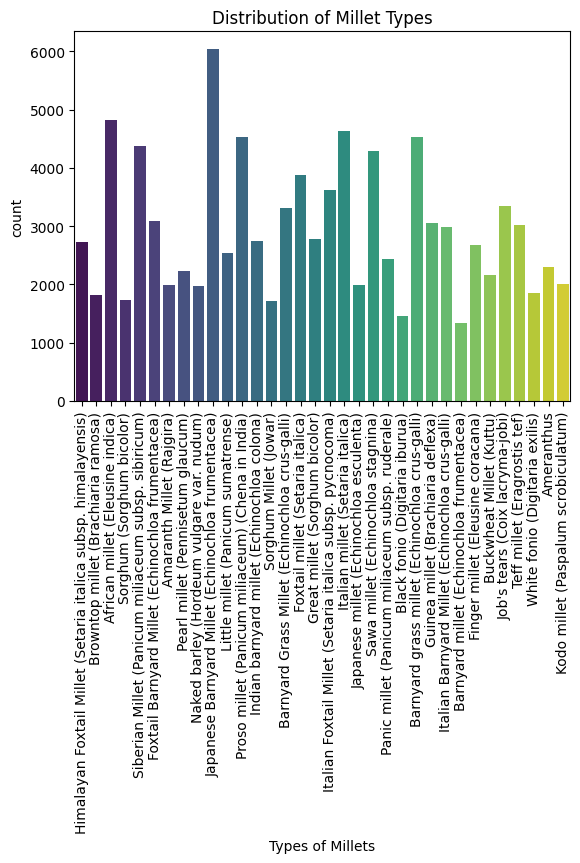

In [19]:
# plotting the counts of each type of millet
g = sns.countplot(data=data, x="Types of Millets", palette="viridis")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Distribution of Millet Types");


In [20]:
# Separate features and target
features = data.drop('Types of Millets', axis=1)
target = data['Types of Millets']

In [21]:
print(features.shape, target.shape)

(100000, 41) (100000,)


In [22]:
# Separating categorical and numerical columns
cat_cols = features.select_dtypes(include="object").columns.to_list()
num_cols = features.select_dtypes(exclude="object").columns.to_list()

print("Categorical Features:")
print(cat_cols)
print("Numerical Features:")
print(num_cols)

Categorical Features:
['Soil type']
Numerical Features:
['Drought resistant', 'Flood Resistant', 'Min Temperature (ºC)', 'Max Temperature (ºC)', 'pH level of the soil Min', 'pH level of the soil Max', 'Soil Salinity (dS/m) Min', 'Soil Salinity (dS/m) Max', 'Rainfall Required (cm) Min', 'Rainfall Required (cm) Max', 'Altitude range (m) Min', 'Altitude range (m) Max', 'Soil Temperature (ºC) Min', 'Soil Temperature (ºC) Max', 'Soil moisture\nmin', 'Soil moisture\nmax', 'Light Duration (hours) Min', 'Light Duration (hours) Max', 'Land usage for each crop (t/ha) Min', 'Land usage for each crop (t/ha) Max', 'Seeding Rate (kg/ha) Min', 'Seeding Rate (kg/ha) Max', 'Maturity time (days) Min', 'Maturity time (days) Max', 'Planting Depth (cm) Min', 'Planting Depth (cm) Max', 'Protein (g)', 'Fat (g)', 'Ash (g)', 'Crude Fibre (g)', 'Carbo- hydrates (g)', 'Energy (kcal)', 'Calcium (mg)', 'Iron (mg)', 'Thiamine (mg)', 'Ribo- flavin (mg)', 'Nia- cin (mg)', 'Price (US$ / Kg)', 'Planting Geometry 1 (cm)

In [23]:
# Cardinality of categorical features
features[cat_cols].nunique().sort_values()

Soil type    10
dtype: int64

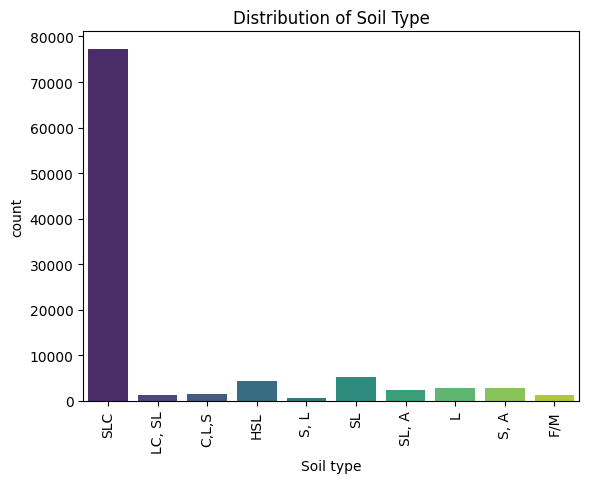

In [24]:
# Distribution of categorical features
g = sns.countplot(data=data, x="Soil type", palette="viridis")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Distribution of Soil Type");

In [25]:
# Cardinality of Numerical Features
features[num_cols].nunique().sort_values()

Drought resistant                           2
Flood Resistant                             2
Soil moisture\nmin                          2
Soil moisture\nmax                         10
Max Temperature (ºC)                       15
Land usage for each crop (t/ha) Min        16
pH level of the soil Max                   20
pH level of the soil Min                   21
Min Temperature (ºC)                       26
Planting Geometry 1 (cm)                   31
Planting Geometry 2 (cm)                   34
Land usage for each crop (t/ha) Max        36
Soil Salinity (dS/m) Min                   98
Soil Salinity (dS/m) Max                  101
Soil Temperature (ºC) Min                 198
Rainfall Required (cm) Min                357
Altitude range (m) Min                    394
Rainfall Required (cm) Max                509
Soil Temperature (ºC) Max                1212
Altitude range (m) Max                   2808
Light Duration (hours) Min              96837
Light Duration (hours) Max        

In [26]:
# Descriptive Statistics
features[num_cols].describe().T

count         mean         std  \
Drought resistant                    100000.0     0.524050    0.499424   
Flood Resistant                      100000.0     0.473390    0.499294   
Min Temperature (ºC)                 100000.0    21.893950    2.915755   
Max Temperature (ºC)                 100000.0    32.148550    2.671826   
pH level of the soil Min             100000.0     5.694604    0.374078   
pH level of the soil Max             100000.0     7.127514    0.250752   
Soil Salinity (dS/m) Min             100000.0     0.925572    1.670754   
Soil Salinity (dS/m) Max             100000.0     3.328862    2.111993   
Rainfall Required (cm) Min           100000.0   402.448870  193.861835   
Rainfall Required (cm) Max           100000.0   605.614840  280.279033   
Altitude range (m) Min               100000.0    54.402440  206.705473   
Altitude range (m) Max               100000.0  1959.234970  356.024046   
Soil Temperature (ºC) Min            100000.0    21.406357    2.474135   
Soil Temperature (ºC) Max            100000.0    32.194384    1.616706   
Soil moisture\nmin                   100000.0    17.569300    2.499052   
Soil moisture\nmax                   100000.0    67.744410    2.834502   
Light Duration (hours) Min           100000.0    11.902252    0.189589   
Light Duration (hours) Max           100000.0    13.961415    0.043839   
Land usage for each crop (t/ha) Min  100000.0     0.999401    0.041988   
Land usage for each crop (t/ha) Max  100000.0     2.071638    0.264197   
Seeding Rate (kg/ha) Min             100000.0     8.368527    5.683106   
Seeding Rate (kg/ha) Max             100000.0    14.407068    8.263748   
Maturity time (days) Min             100000.0    71.311636    7.899473   
Maturity time (days) Max             100000.0    95.599407   10.578727   
Planting Depth (cm) Min              100000.0     1.890929    0.326111   
Planting Depth (cm) Max              100000.0     4.121385    5.417584   
Protein (g)                          100000.0    10.450348    0.539073   
Fat (g)                              100000.0     2.973701    0.422813   
Ash (g)                              100000.0     1.864382    0.225375   
Crude Fibre (g)                      100000.0     4.830919    1.780167   
Carbo- hydrates (g)                  100000.0    72.326164    3.688898   
Energy (kcal)                        100000.0   350.677697    7.268772   
Calcium (mg)                         100000.0    41.734216   20.974767   
Iron (mg)                            100000.0     4.758694    1.043241   
Thiamine (mg)                        100000.0     0.309598    0.038483   
Ribo- flavin (mg)                    100000.0     0.138848    0.017531   
Nia- cin (mg)                        100000.0     1.541303    0.399062   
Price (US$ / Kg)                     100000.0    17.479662    1.544774   
Planting Geometry 1 (cm)             100000.0    18.654500    3.537823   
Planting Geometry 2 (cm)             100000.0    28.690450    4.556935   

                                            min          25%          50%  \
Drought resistant                      0.000000     0.000000     1.000000   
Flood Resistant                        0.000000     0.000000     0.000000   
Min Temperature (ºC)                   5.000000    21.000000    22.000000   
Max Temperature (ºC)                  21.000000    30.000000    33.000000   
pH level of the soil Min               4.000000     5.600000     5.900000   
pH level of the soil Max               6.000000     7.000000     7.100000   
Soil Salinity (dS/m) Min               0.000000     0.000000     0.100000   
Soil Salinity (dS/m) Max               2.000000     2.000000     2.100000   
Rainfall Required (cm) Min            20.000000   416.000000   486.000000   
Rainfall Required (cm) Max            50.000000   636.000000   729.000000   
Altitude range (m) Min                 0.000000     1.000000     4.000000   
Altitude range (m) Max               200.000000  1832.000000  2006.000000   
Soil

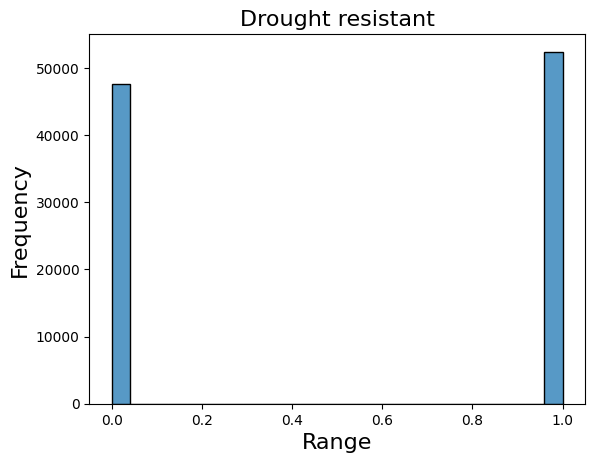

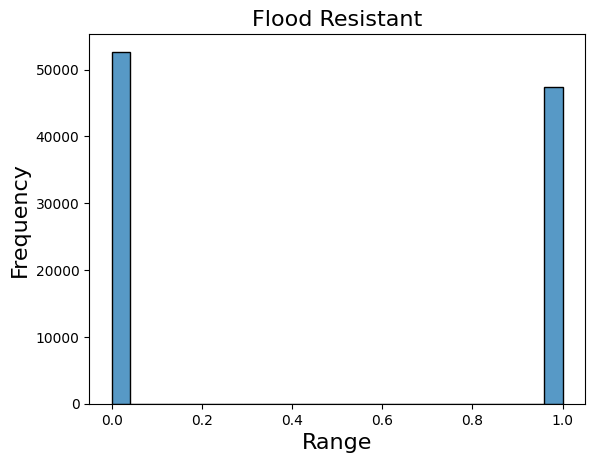

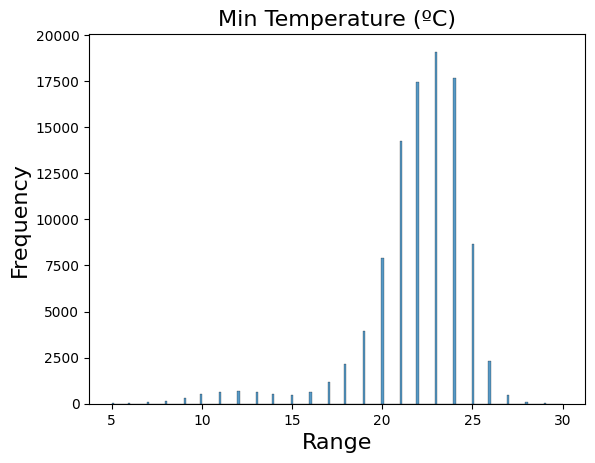

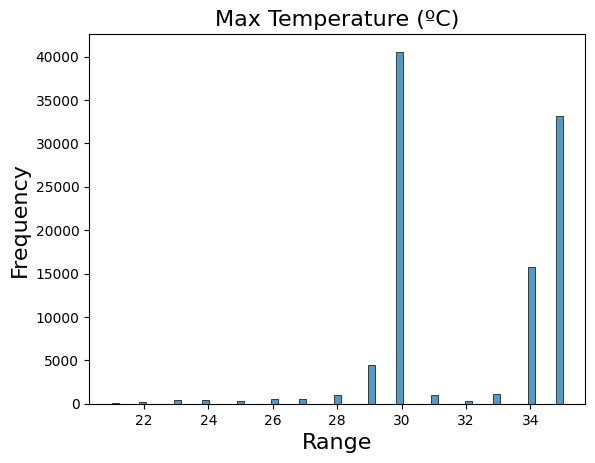

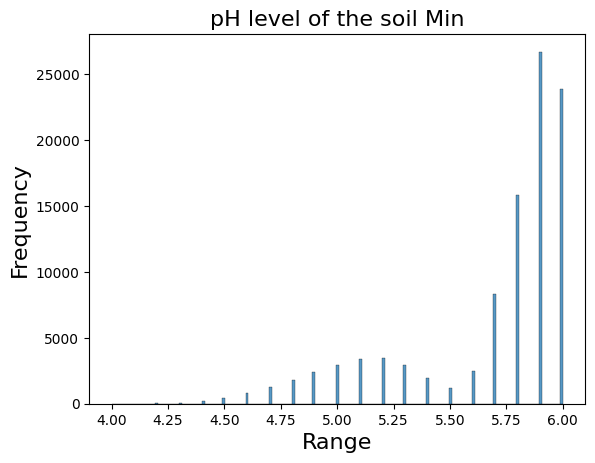

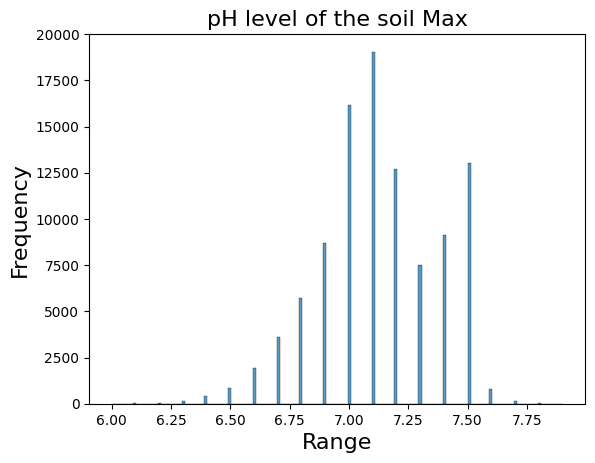

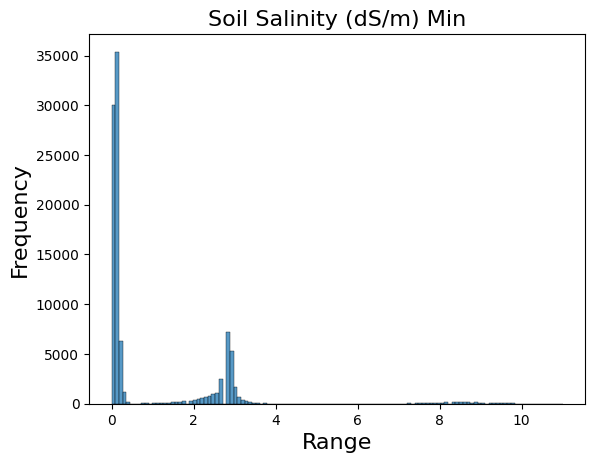

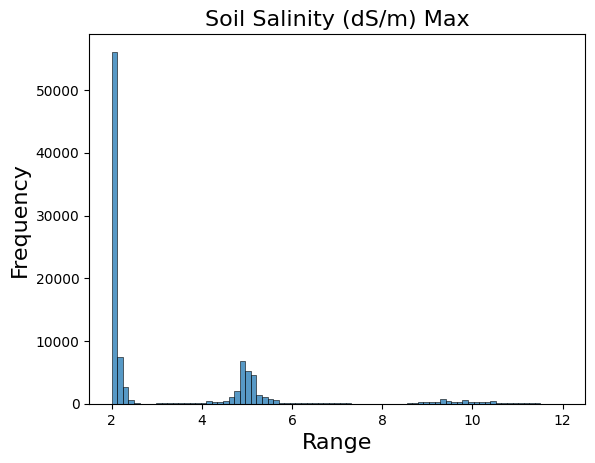

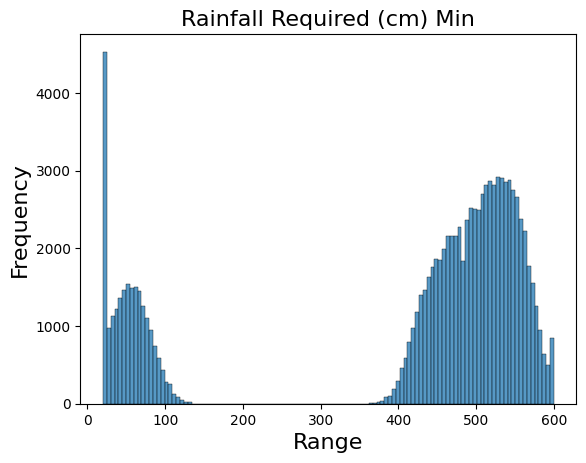

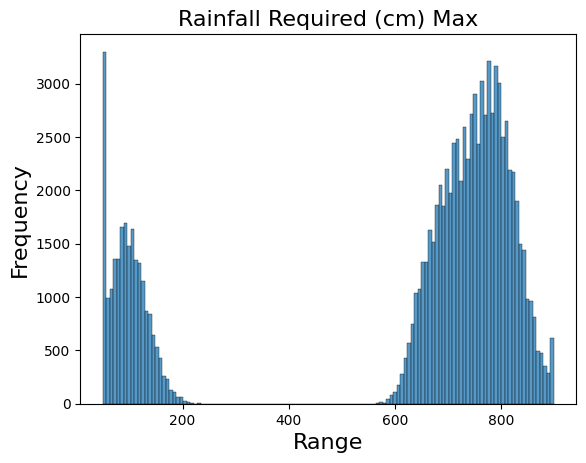

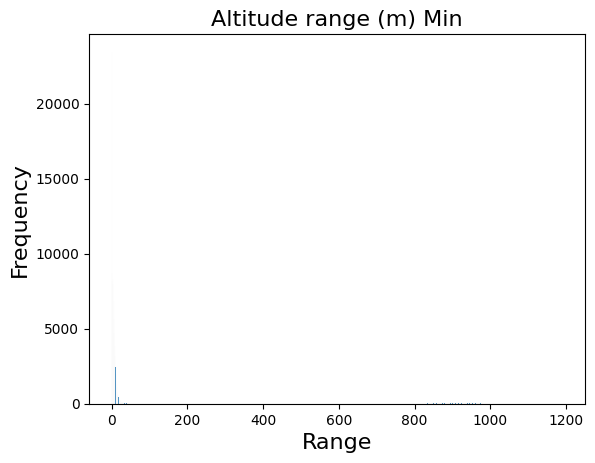

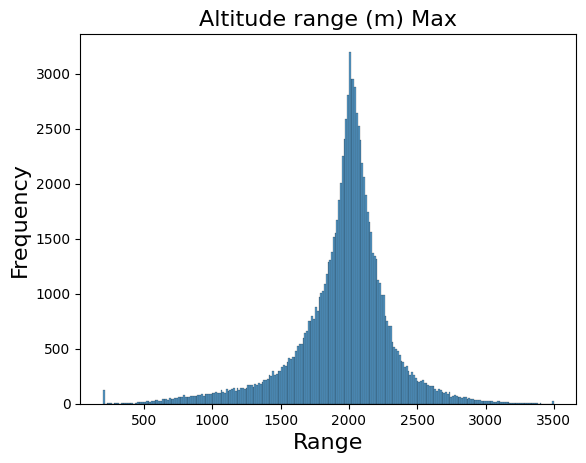

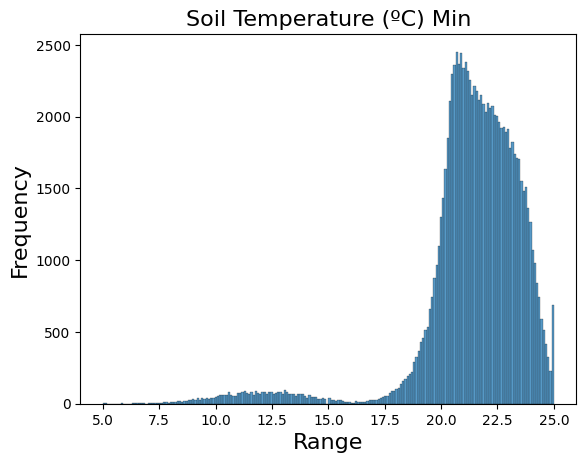

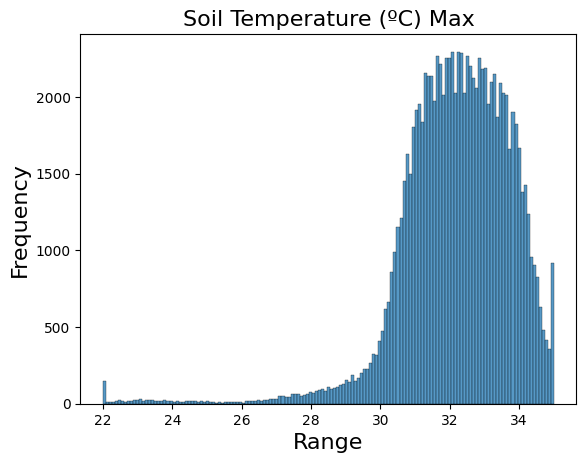

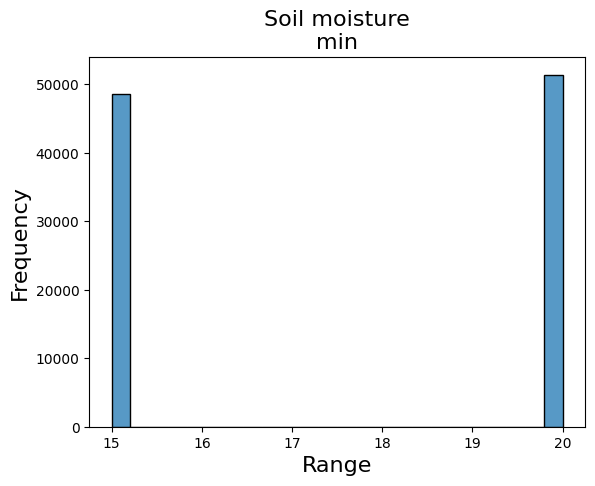

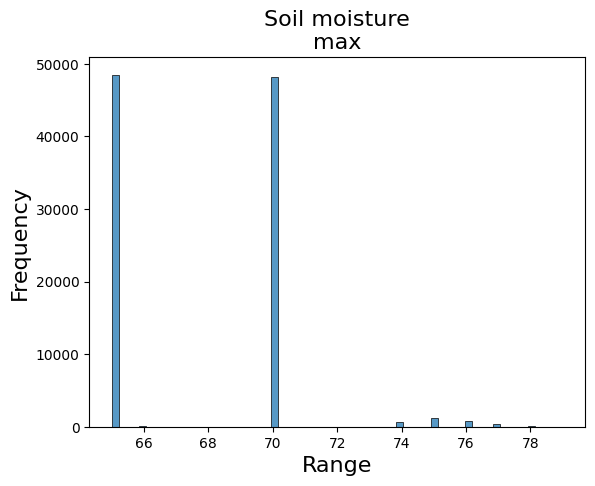

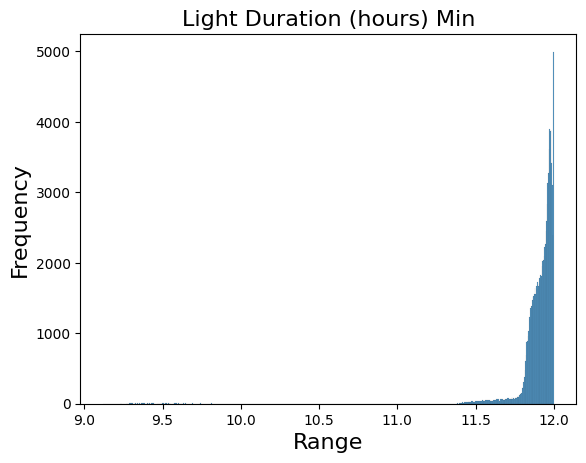

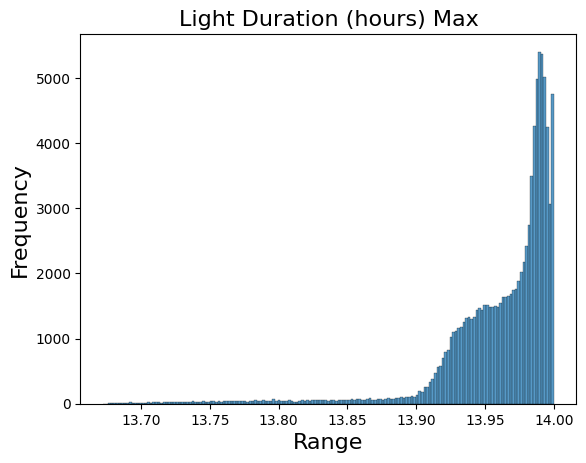

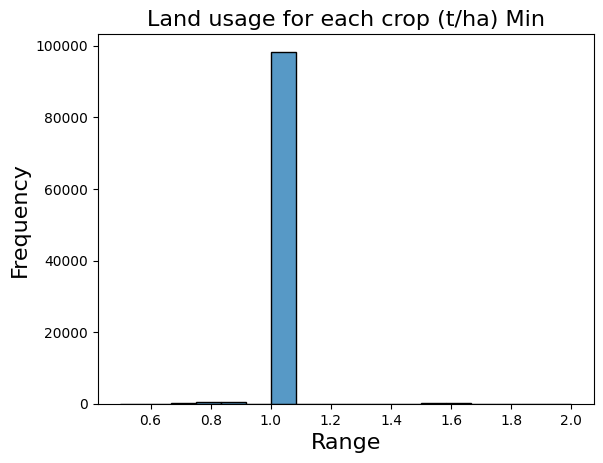

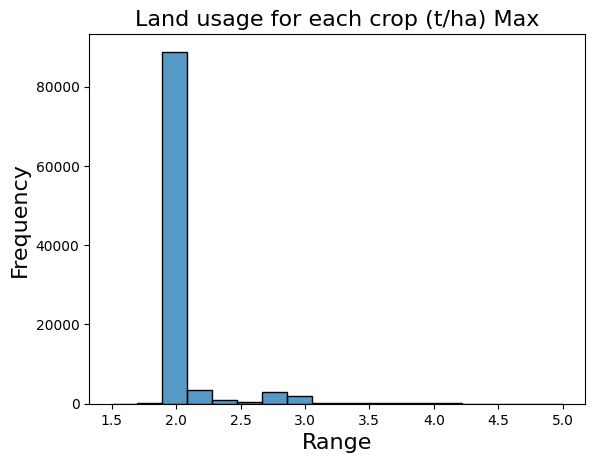

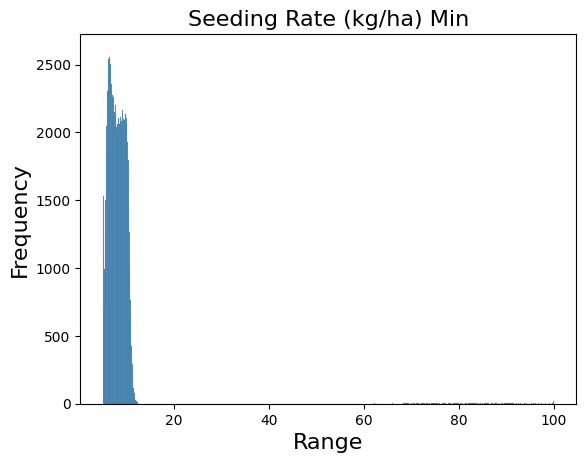

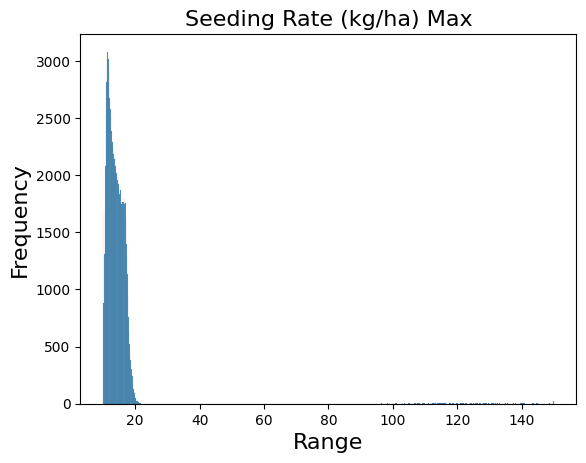

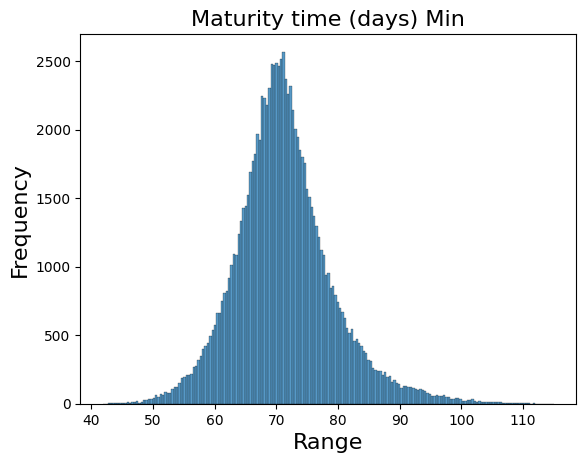

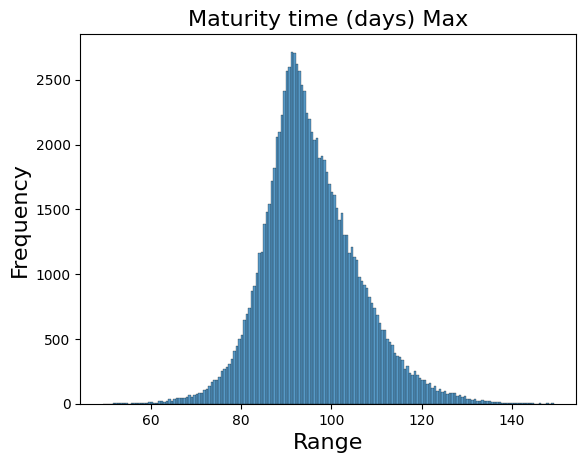

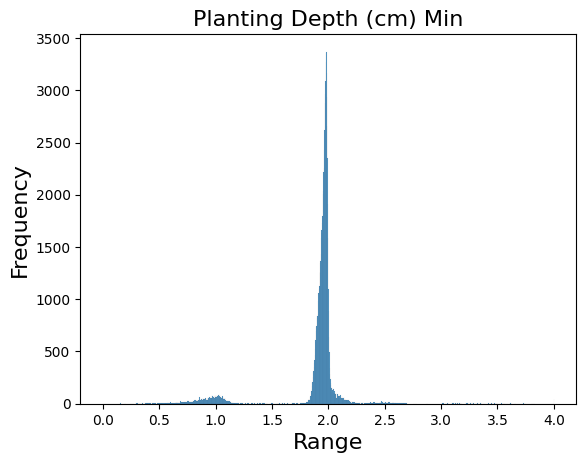

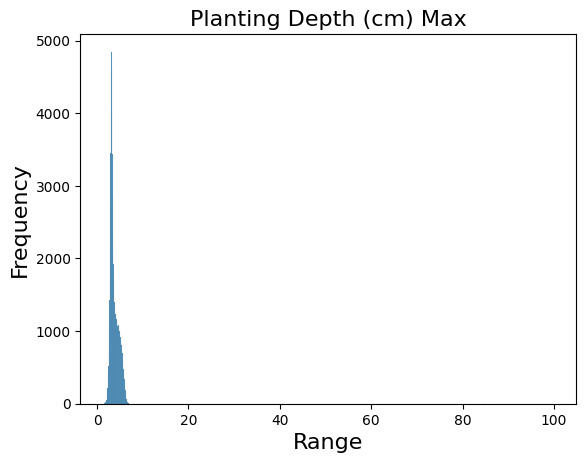

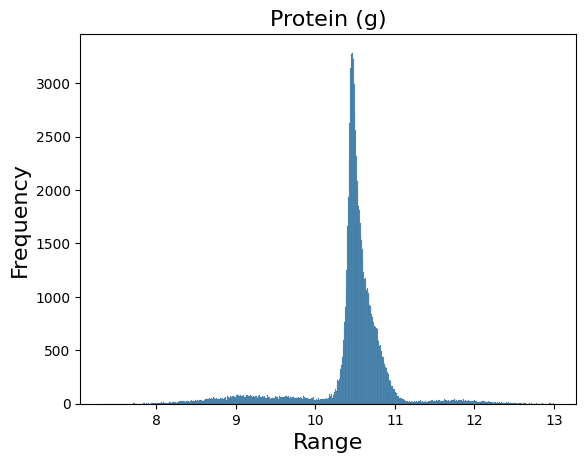

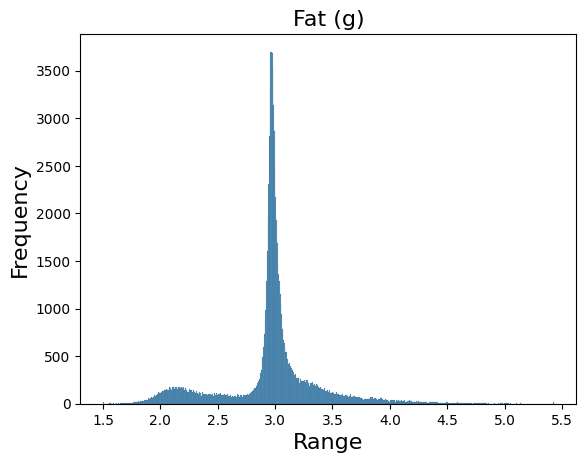

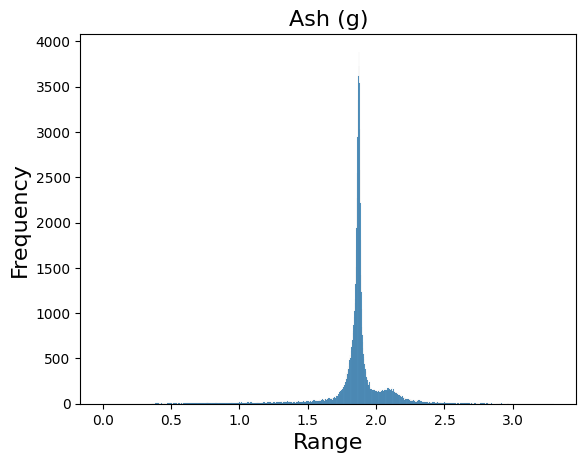

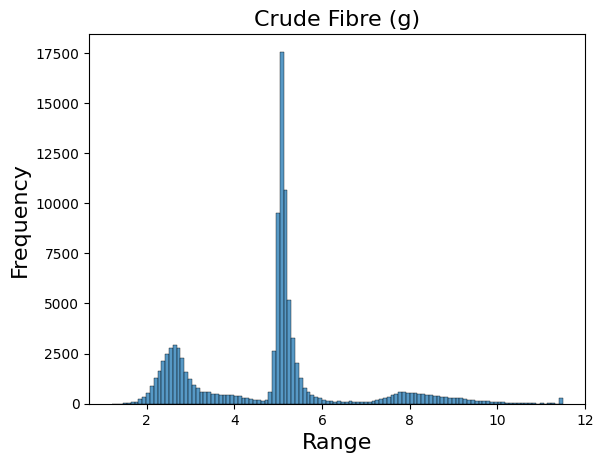

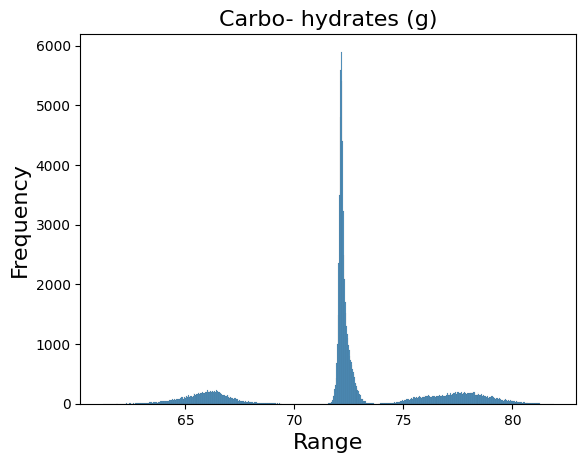

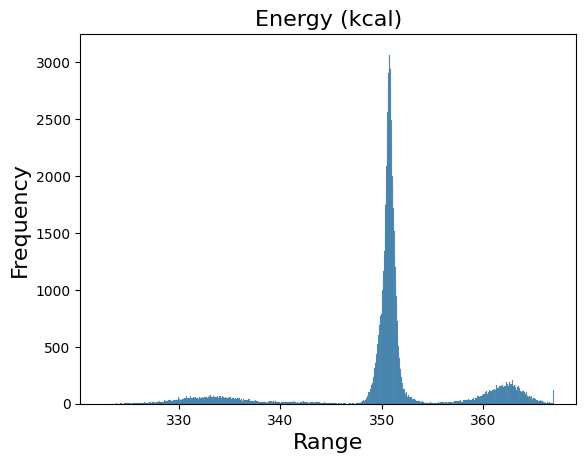

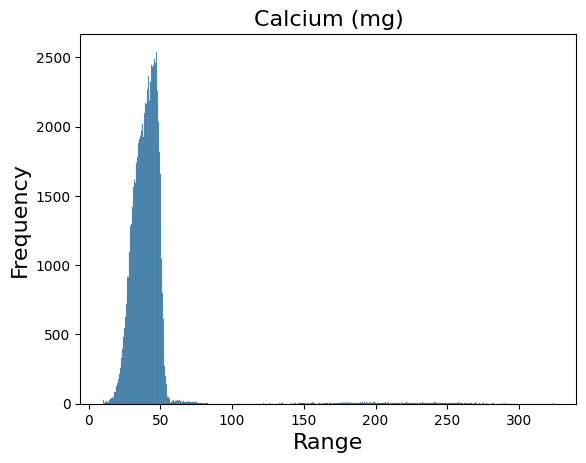

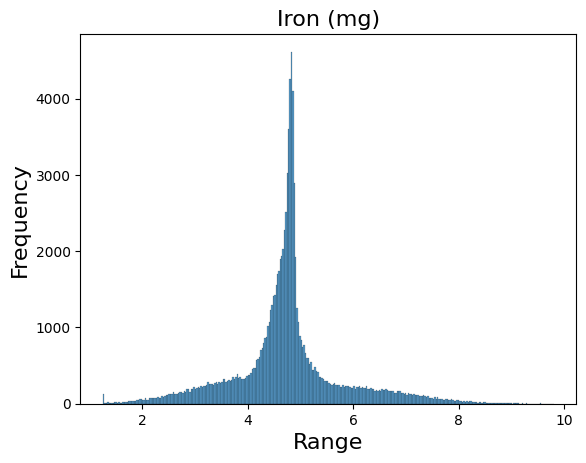

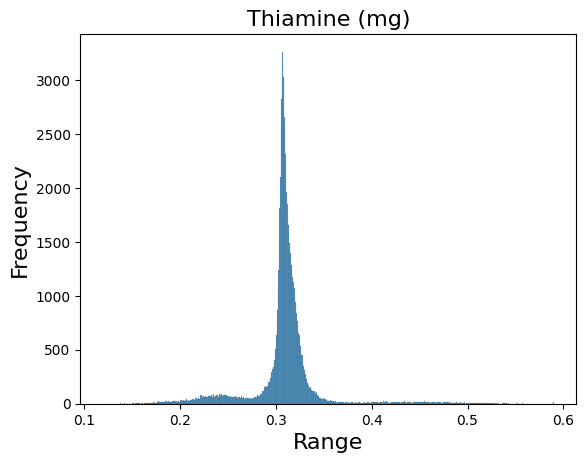

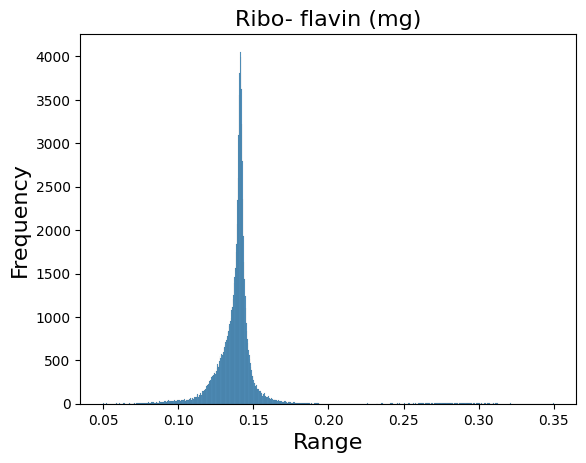

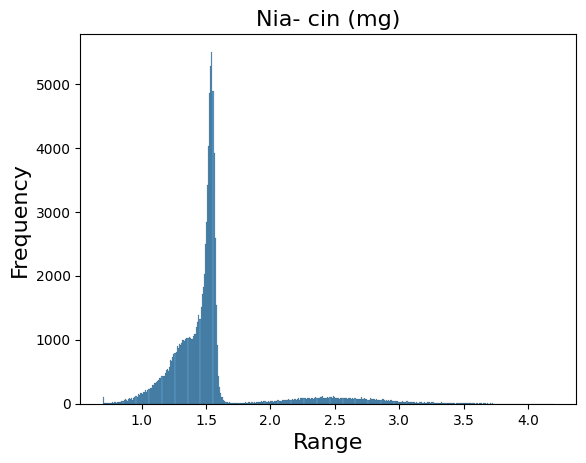

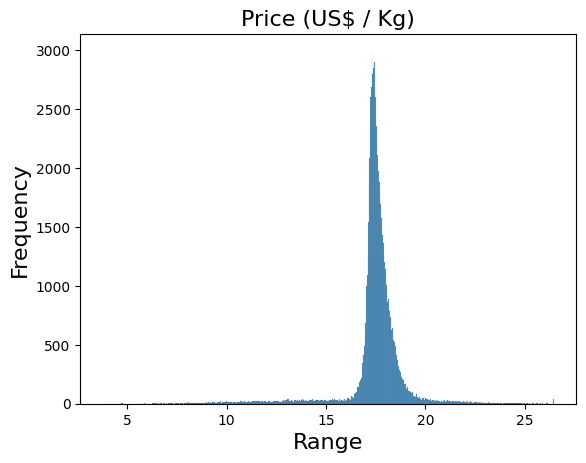

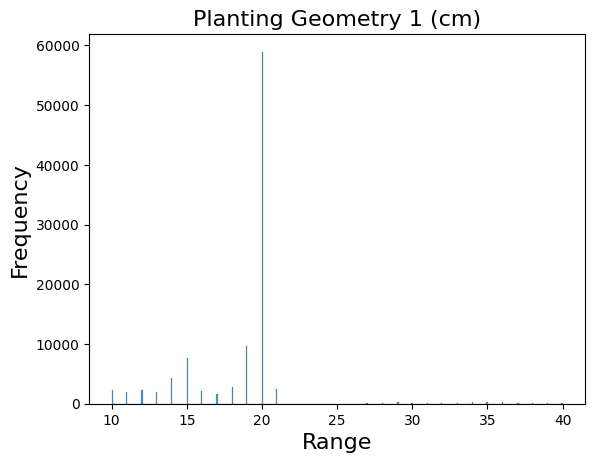

In [27]:
for name in num_cols[0: len(num_cols)-1]:
    sns.histplot(features[name].values) # histogram plot
    plt.title(name, fontsize= 16)
    plt.xlabel('Range', fontsize= 16)
    plt.ylabel('Frequency', fontsize= 16)
    plt.show()

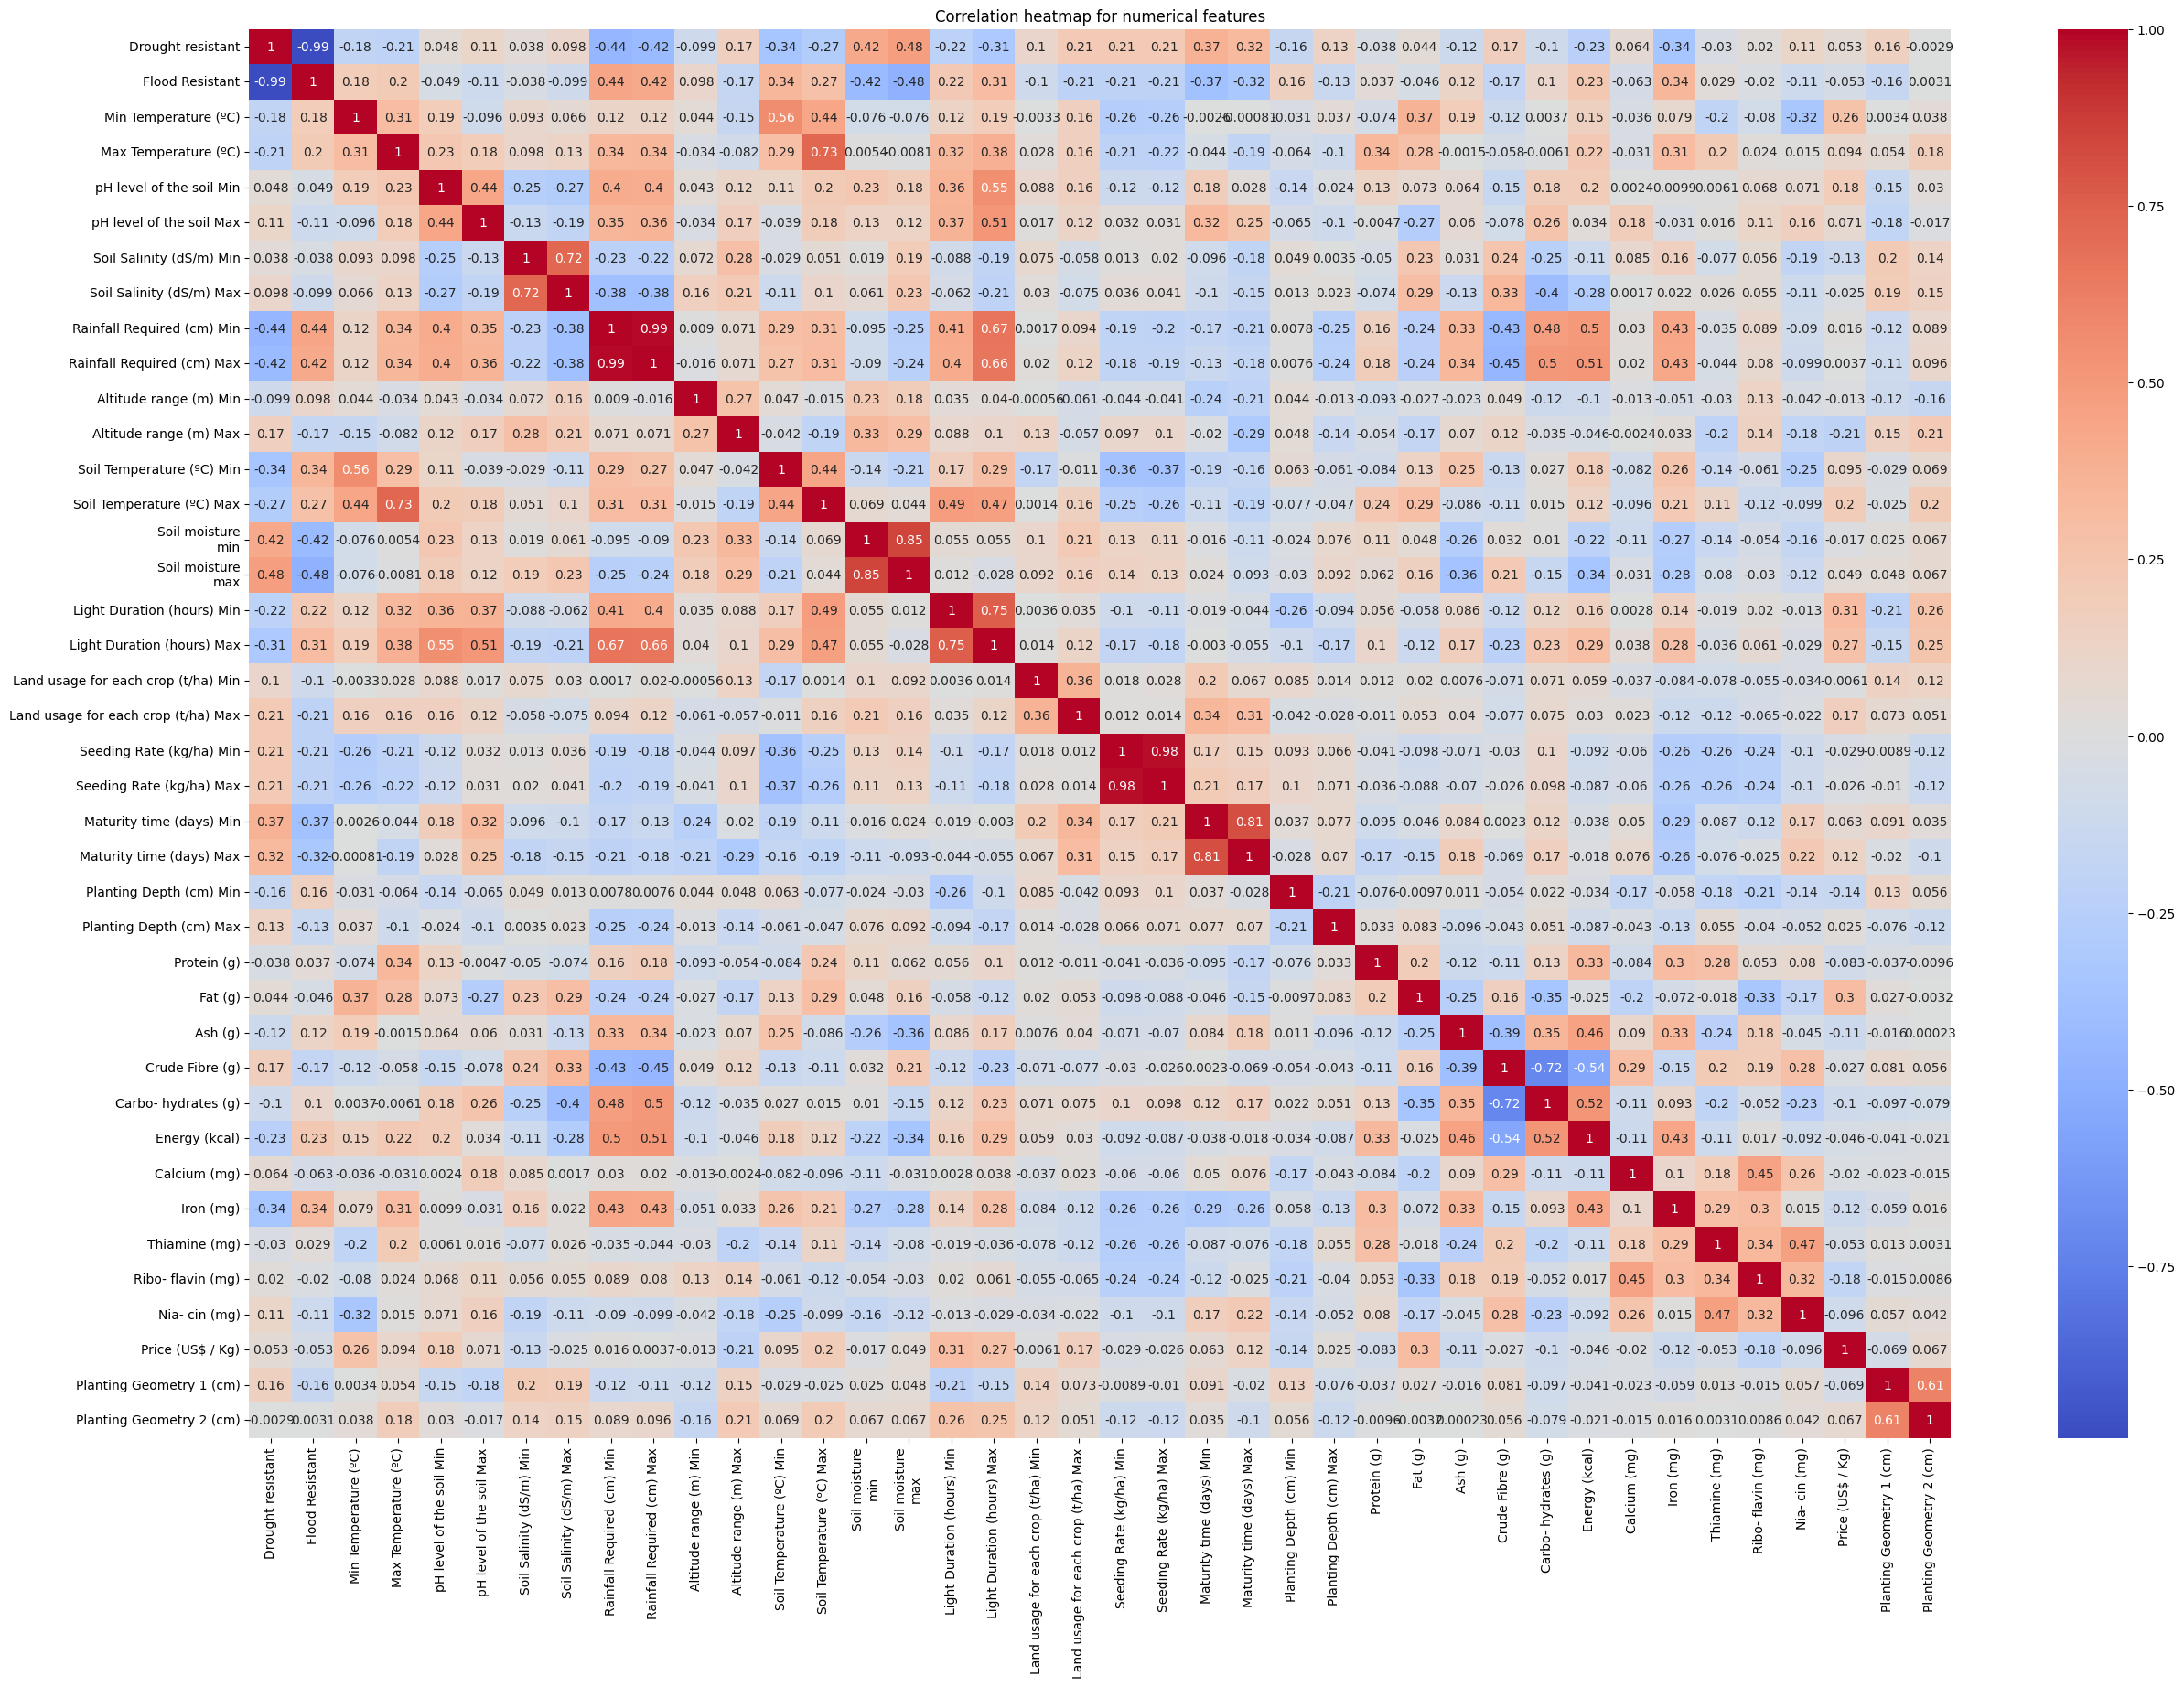

In [28]:
# Correlation heatmap for numerical features

plt.figure(figsize=(30,20))

sns.heatmap(features[num_cols].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation heatmap for numerical features")
plt.show()

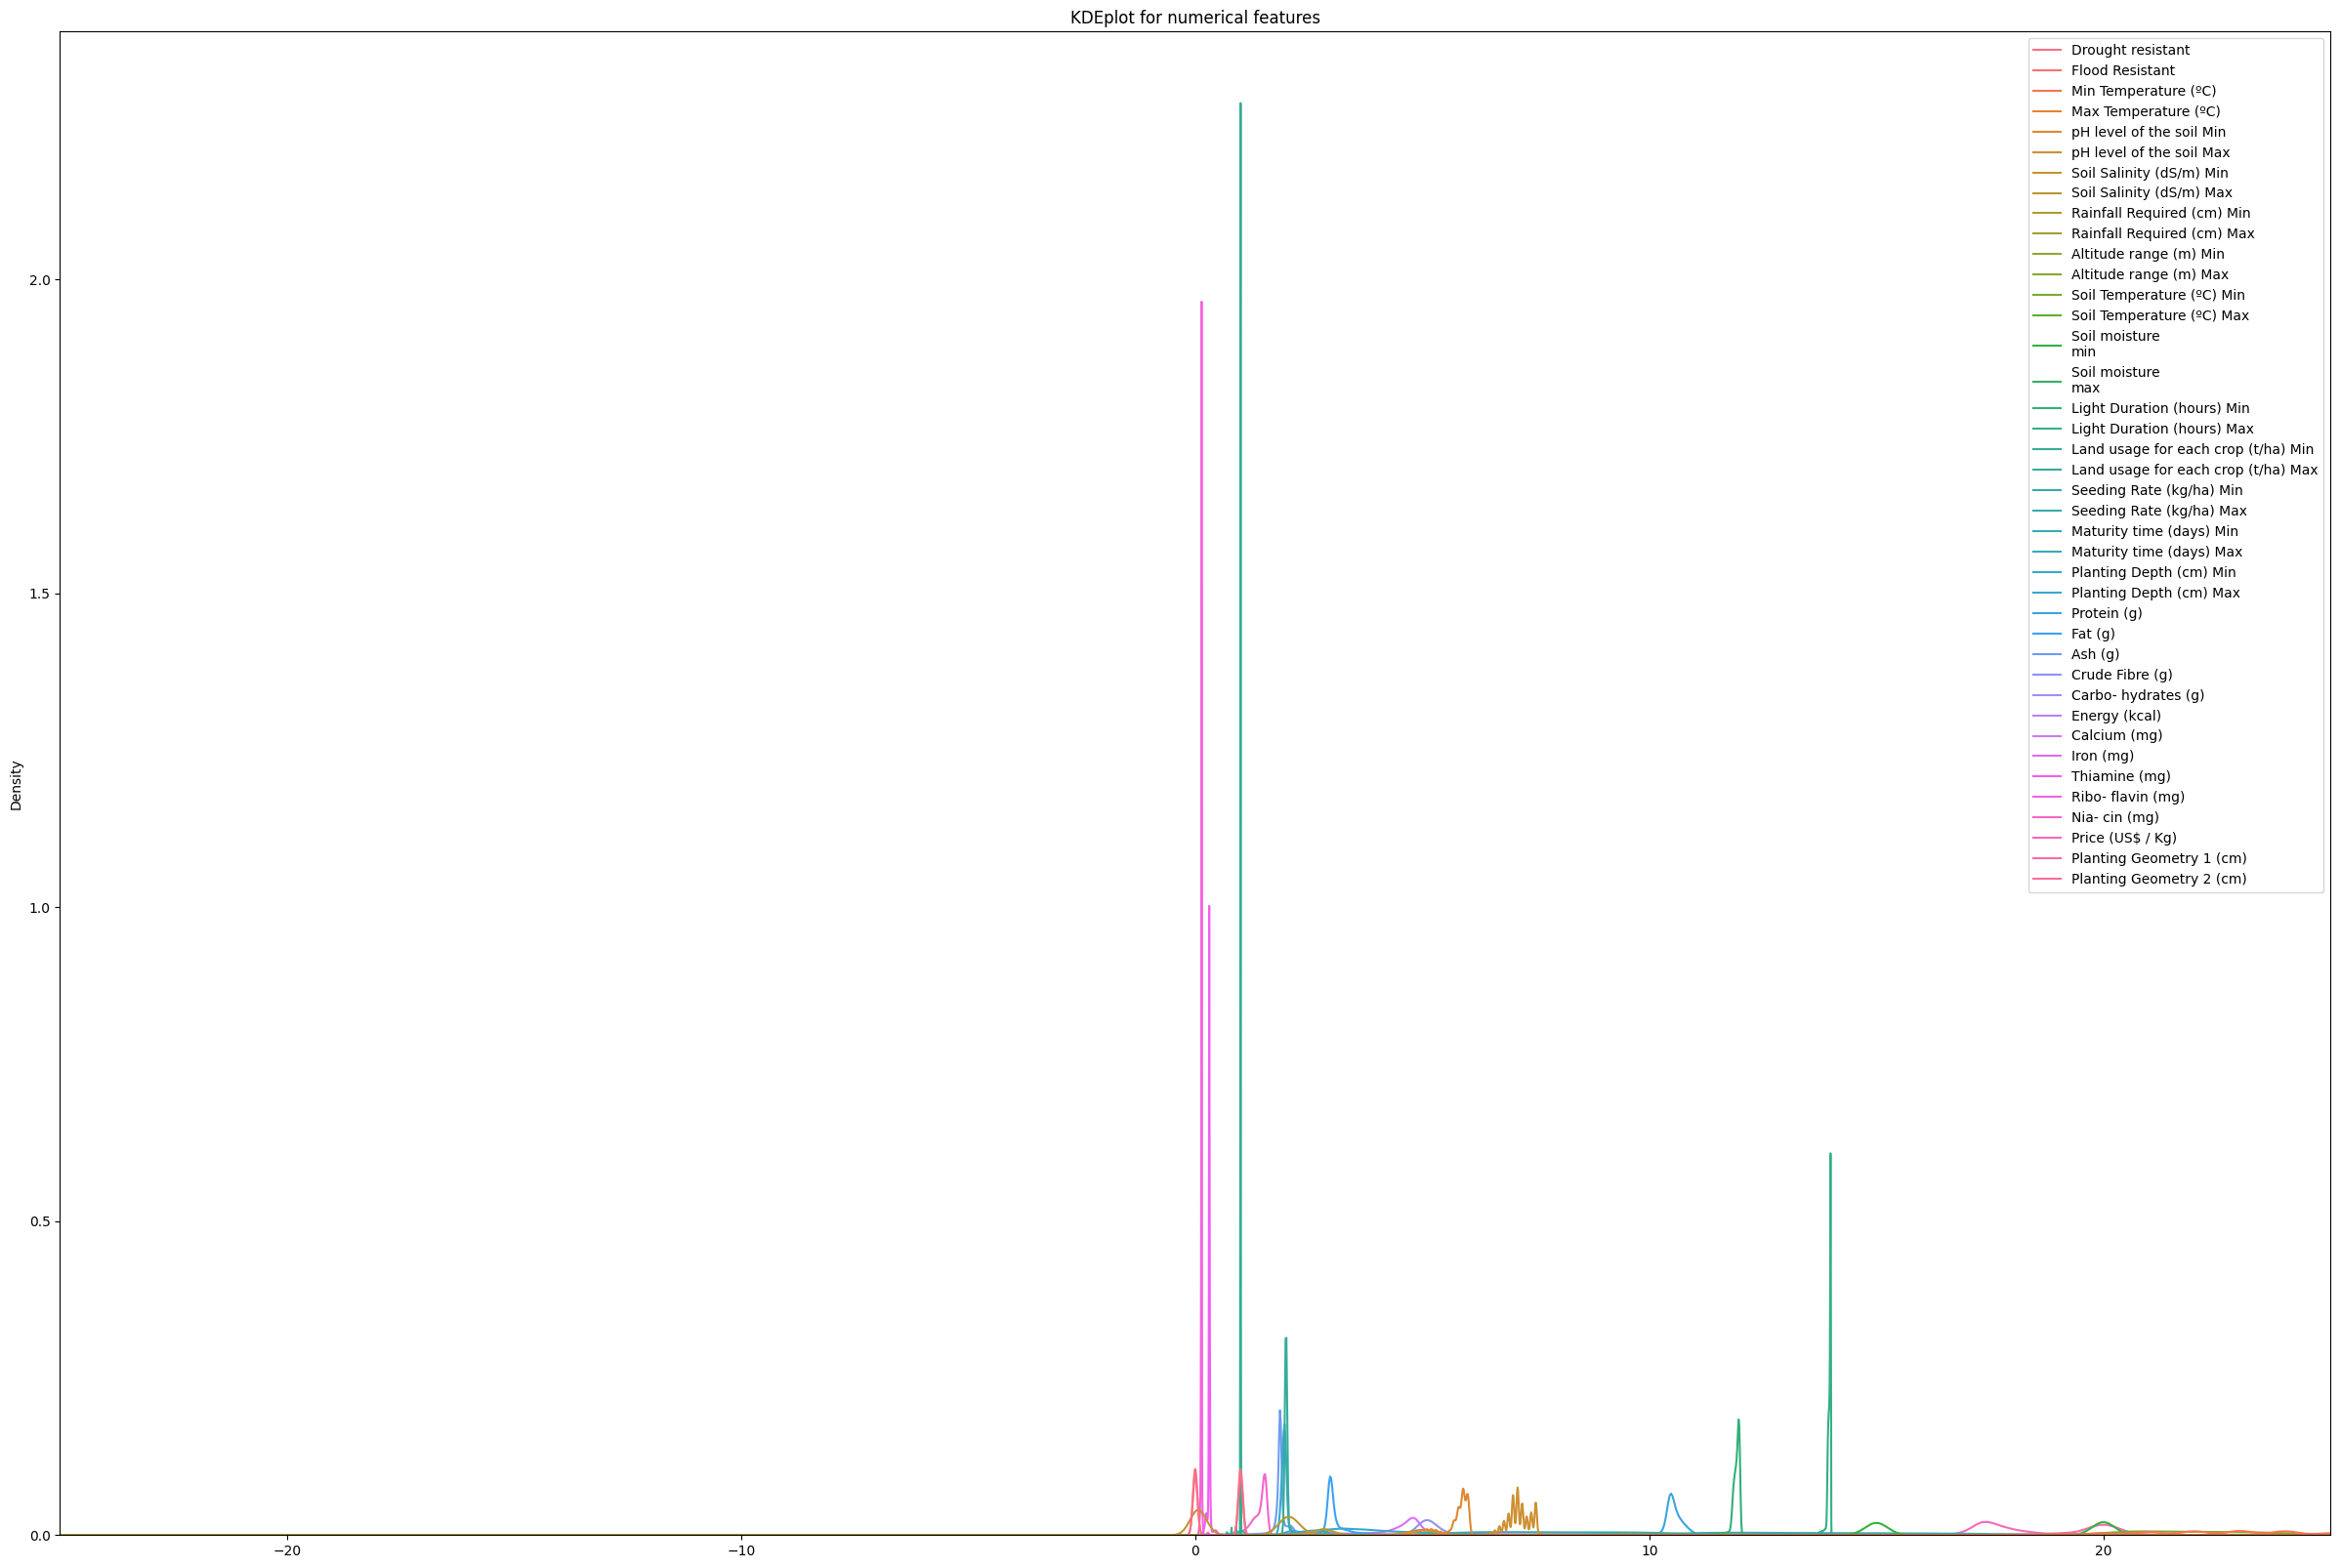

In [29]:
# Kernel Density Estimate (KDE) plot
plt.figure(figsize=(30, 20))
plt.title("KDEplot for numerical features")
plt.xlim(-25, 25)
sns.kdeplot(data= features[num_cols])
plt.show()

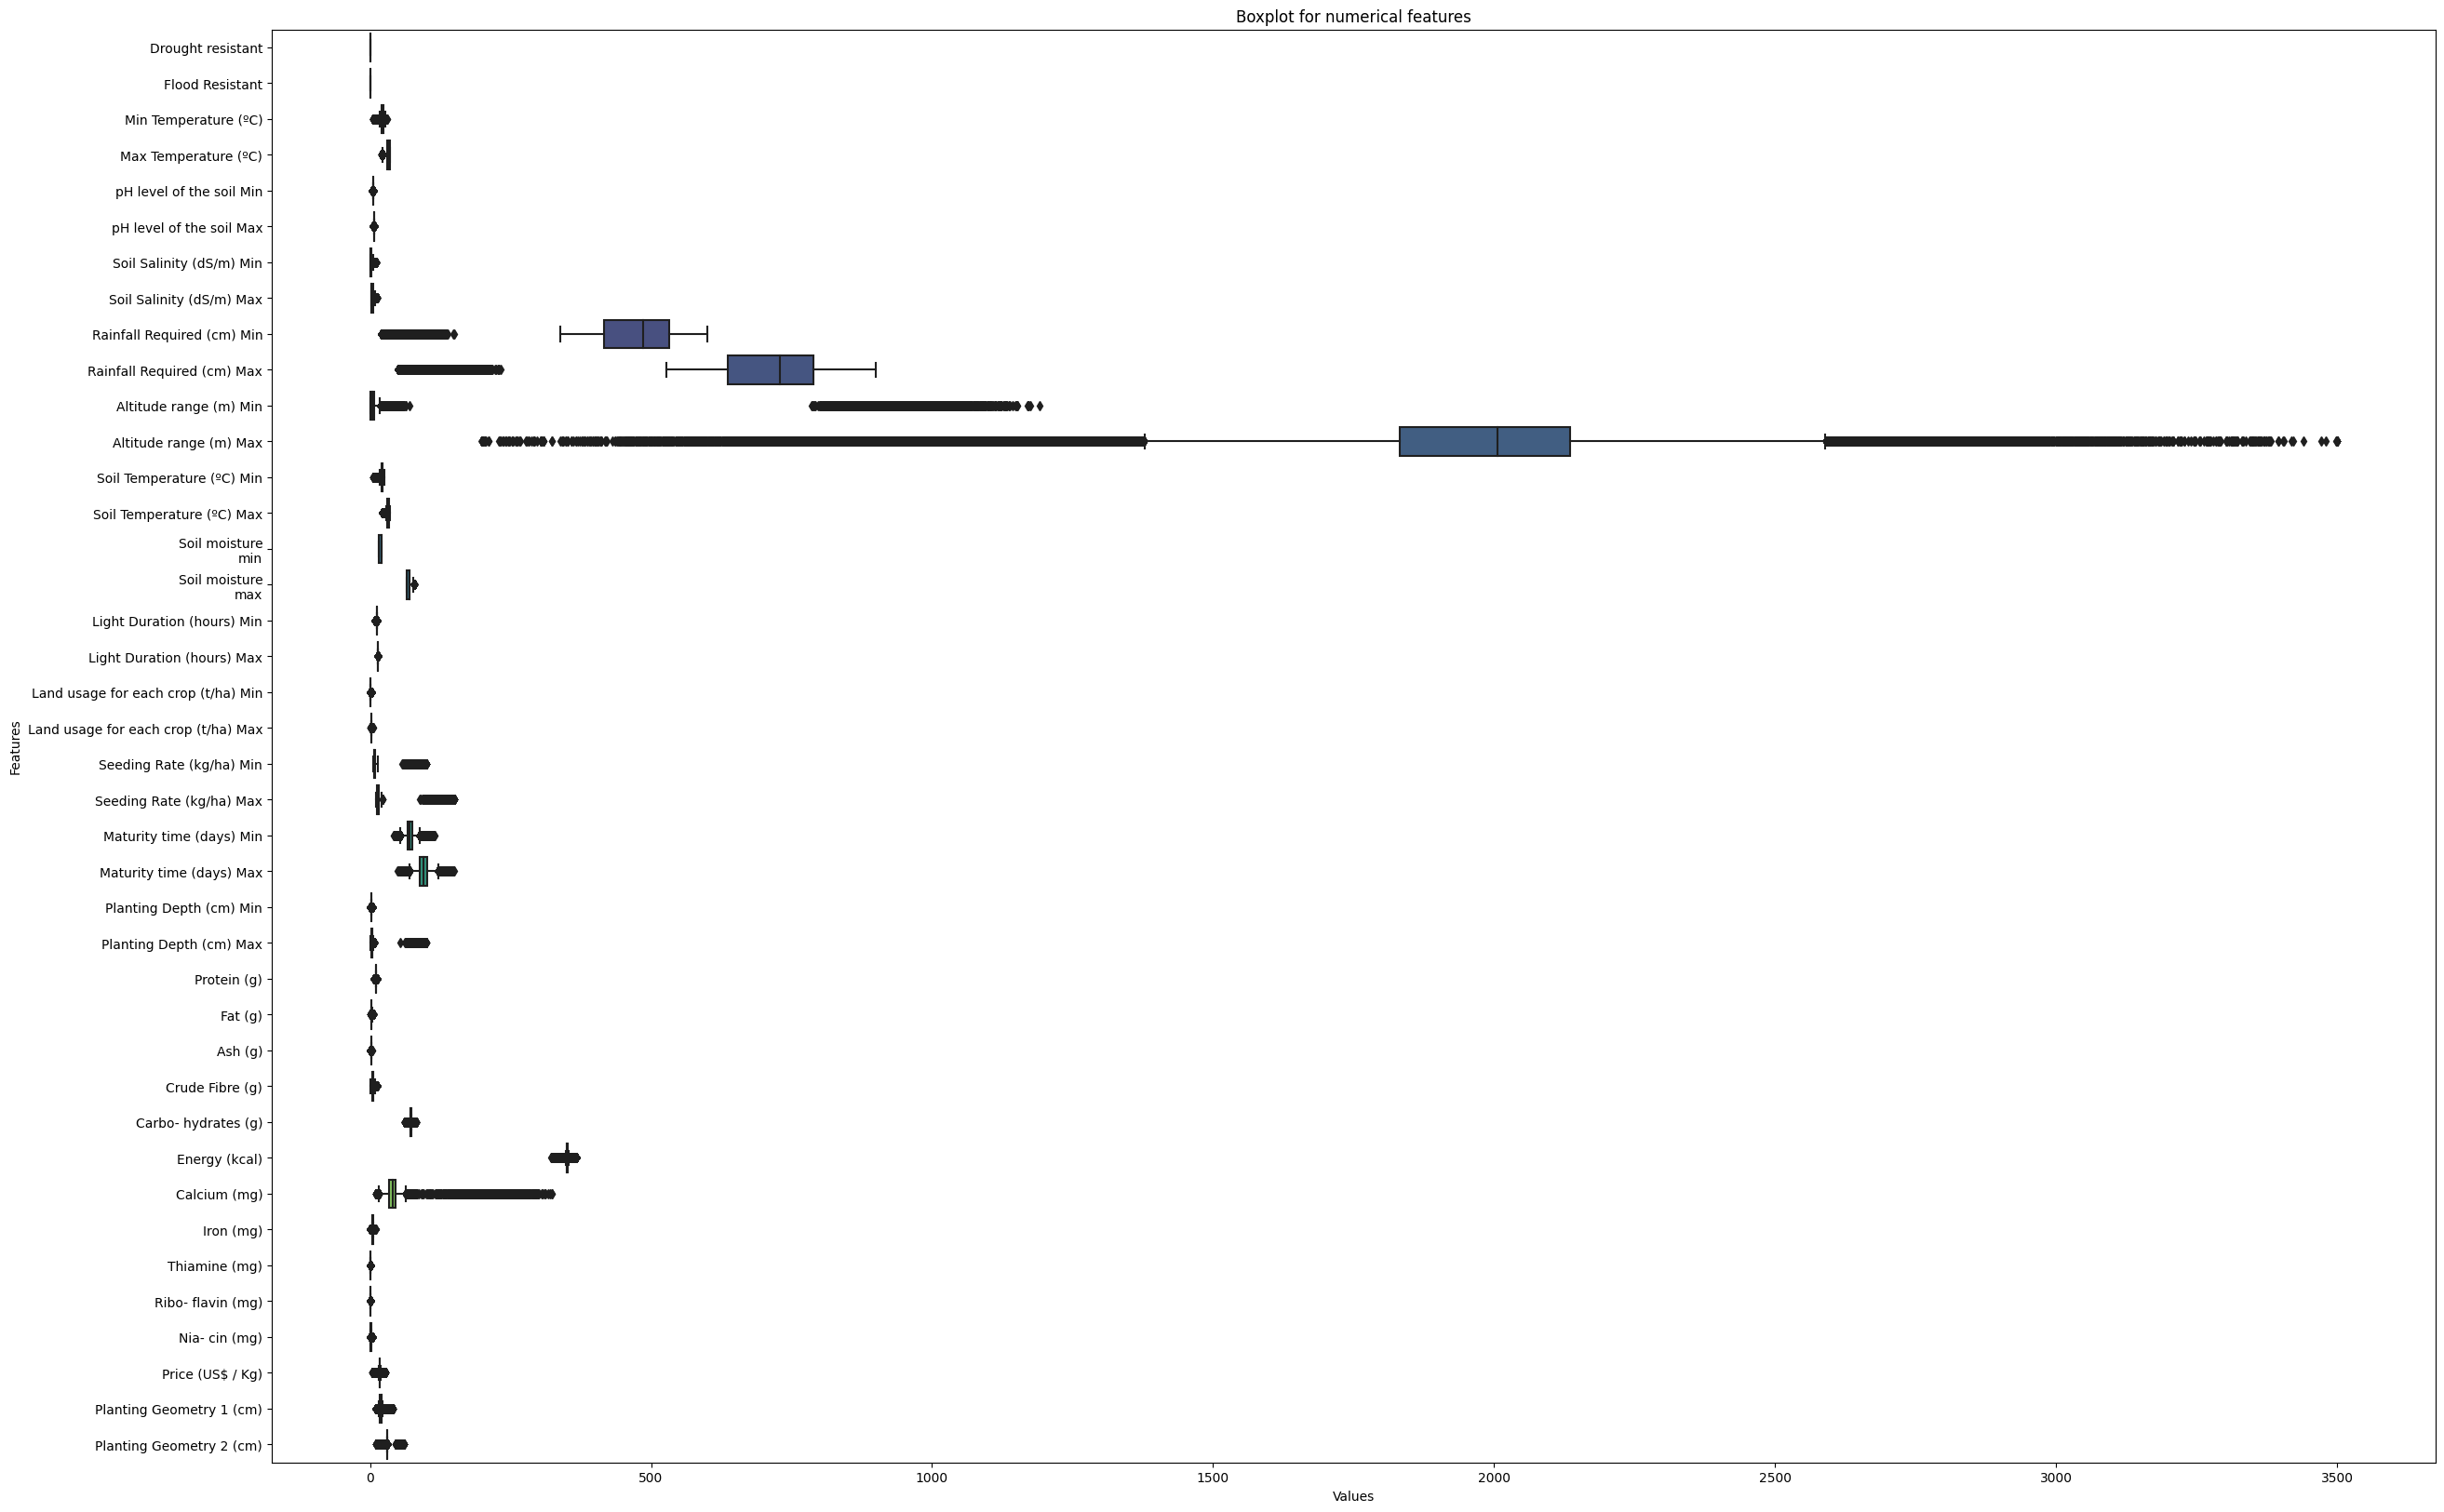

In [30]:
# Boxplots
plt.figure(figsize=(30, 20))
sns.boxplot(data= features[num_cols], orient='horizontal', palette= 'viridis')
plt.title("Boxplot for numerical features")
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

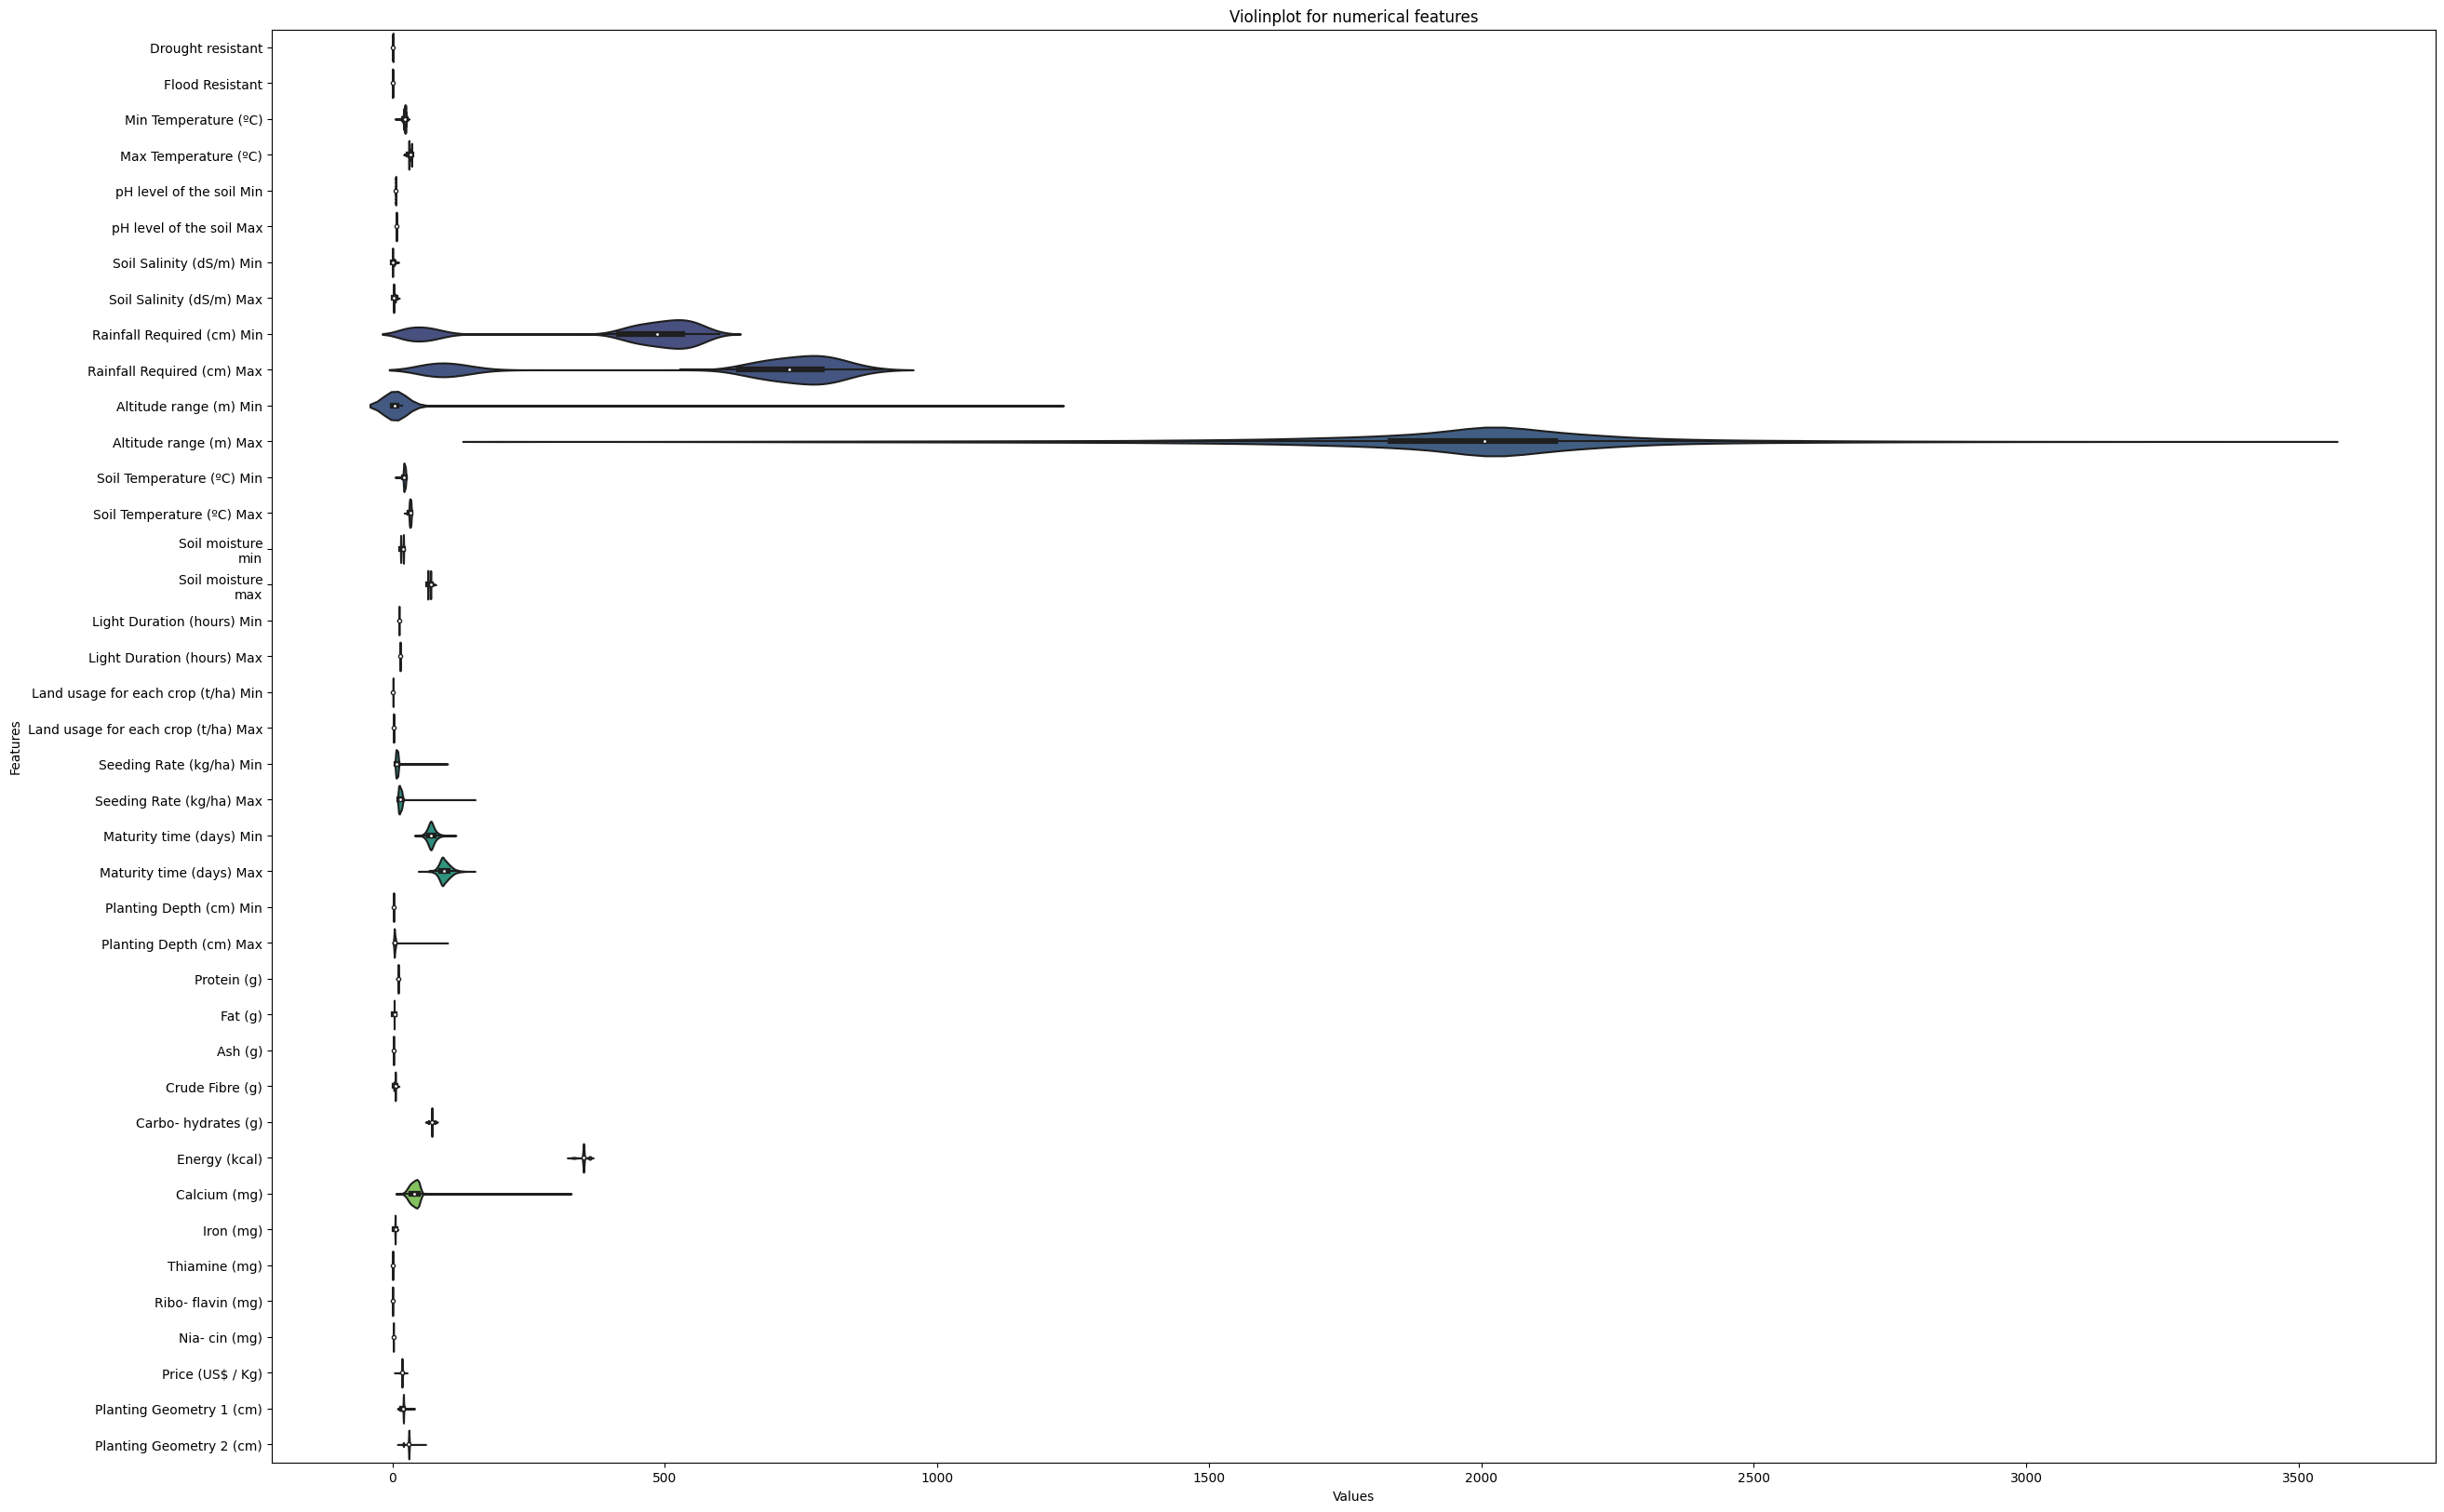

In [31]:
# Violin Plot
plt.figure(figsize=(30, 20))
sns.violinplot(data= features[num_cols], orient='horizontal', palette= 'viridis', scale= 'width')
plt.title("Violinplot for numerical features")
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

#### Data Preprocessing

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target)
X = features.copy()

print(y)
print(X.shape, y.shape)
X.head()

[14  7  0 ... 11 16 19]
(100000, 41) (100000,)


Drought resistant  Flood Resistant  Min Temperature (ºC)  \
0                1.0              0.0                  23.0   
1                0.0              1.0                  23.0   
2                1.0              0.0                  22.0   
3                1.0              0.0                  25.0   
4                1.0              0.0                  24.0   

   Max Temperature (ºC)  pH level of the soil Min  pH level of the soil Max  \
0                  30.0                       6.0                       7.1   
1                  30.0                       6.0                       7.1   
2                  30.0                       5.2                       7.4   
3                  34.0                       5.9                       7.3   
4                  30.0                       6.0                       7.5   

  Soil type  Soil Salinity (dS/m) Min  Soil Salinity (dS/m) Max  \
0       SLC                       2.7                       5.0   
1       SLC                       0.1                       2.1   
2       SLC                       0.1                       2.3   
3       SLC                       2.9                       4.9   
4       SLC                       0.1                       2.0   

   Rainfall Required (cm) Min  ...  Carbo- hydrates (g)  Energy (kcal)  \
0                       502.0  ...            72.105648     350.661745   
1                       524.0  ...            72.567017     351.348496   
2                       462.0  ...            77.501738     349.923701   
3                       498.0  ...            76.575709     362.844536   
4                       481.0  ...            72.346898     350.627315   

   Calcium (mg)  Iron (mg)  Thiamine (mg)  Ribo- flavin (mg)  Nia- cin (mg)  \
0     41.932659   4.642449       0.306460           0.143941       1.515776   
1     39.113090   4.984625       0.301170           0.138188       1.453780   
2     42.587574   4.368040       0.319526           0.145180       1.412501   
3     39.154175   4.775149       0.307034           0.134631       1.350118   
4     47.273792   4.559569       0.311642           0.144122       1.472877   

   Price (US$ / Kg)  Planting Geometry 1 (cm)  Planting Geometry 2 (cm)  
0         17.319114                        20                        30  
1         17.275401                        15                        30  
2         17.632721                        20                        30  
3         17.199486                        20                        30  
4         17.577191                        19                        30  

[5 rows x 41 columns]

In [33]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.feature_selection import GenericUnivariateSelect, SelectKBest, RFE, SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV,RandomizedSearchCV, train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, recall_score, accuracy_score, f1_score, precision_score

from sklearn import set_config

from xgboost import XGBClassifier

!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 11.2 MB/s eta 0:00:00


#### Feature Selection

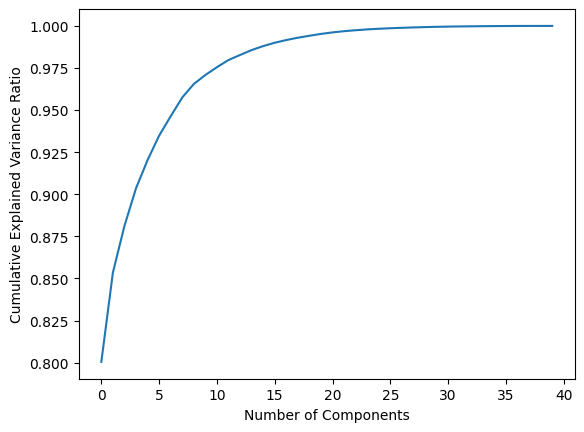

16

In [34]:
# create an instance of PCA
pca = PCA()

# fit and transform the selected features after scaling
pca.fit(RobustScaler().fit_transform(features[num_cols]))

# plot the cumulative explained variance ratio
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# determine the number of components to cover up to 99% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.99) + 1
n_components

In [35]:
# Categorical encoding
categorical_transformers = Pipeline([
                                    ('selector', ColumnTransformer([
                                                                    ('select', 'passthrough', cat_cols)
                                                                    ])),
                                    ('one-hot', OneHotEncoder(handle_unknown= 'ignore', sparse= False))
                                    ])

#Scaling for numerical features
numerical_transformers = Pipeline([
                              ('selector', ColumnTransformer([
                                                             ('select', 'passthrough', num_cols)
                                                             ])),
                              ('scaler', RobustScaler()),
                              ('pca', PCA(n_components=n_components))
                              ])

#Data Preprocess Pipeline
preprocess_pipe = FeatureUnion(transformer_list=[
                                                     ('categorical', categorical_transformers),
                                                     ('numerical', numerical_transformers)
                                                     ])

In [36]:
from sklearn import set_config
set_config(display= 'diagram')

# displays HTML representation
preprocess_pipe

FeatureUnion(transformer_list=[('categorical',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select',
                                                                                  'passthrough',
                                                                                  ['Soil '
                                                                                   'type'])])),
                                                ('one-hot',
                                                 OneHotEncoder(handle_unknown='ignore',
                                                               sparse=False))])),
                               ('numerical',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select',
                                                                                  'passthrough',
                                                                                  ['Drought '
                                                                                   'resistant',
                                                                                   'Flood '
                                                                                   'Resista...
                                                                                   'Min',
                                                                                   'Land '
                                                                                   'usage '
                                                                                   'for '
                                                                                   'each '
                                                                                   'crop '
                                                                                   '(t/ha) '
                                                                                   'Max',
                                                                                   'Seeding '
                                                                                   'Rate '
                                                                                   '(kg/ha) '
                                                                                   'Min',
                                                                                   'Seeding '
                                                                                   'Rate '
                                                                                   '(kg/ha) '
                                                                                   'Max',
                                                                                   'Maturity '
                                                                                   'time '
                                                                                   '(days) '
                                                                                   'Min',
                                                                                   'Maturity '
                                                                                   'time '
                                                                                   '(days) '
                                                                                   'Max',
                                                                                   'Planting '
                                                                                   'Depth '
                                                                                   '(cm) '
                                                                                   'Min',
                                          

#### Model Building

In [37]:
# Initialization of random state parameter in estimators and CV splitters
#rng= np.random.RandomState(0)
rng = 42

In [38]:
def construct_pipeline(classifier, preprocessor):
    '''constructs pipeline object by combining a preprocessing stage and an estimator
    Args:
        classifier: Estimator object
        preprocessor: Preprocessing transformer object

    Returns:
        pipeline object
    '''
    full_pipe= Pipeline([
                        ('preprocess', preprocessor),
                        ('clf', classifier )
                        ])
    return full_pipe

def train_model(classifier, preprocessor, X_train, y_train):
    '''Trains a model with on given preprocssing and classification stages
    Args:
        classifier: Estimator object
        preprocessor: Preprocessing transformer object
        X_train: Training data feature matrix
        y_train: Training data label vector

    Returns:
        trained model
    '''
    X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                       test_size= 0.3,
                                                       stratify=y,
                                                       random_state= rng)

    full_pipe= construct_pipeline(classifier, preprocessor)
    full_pipe.fit(X_train, y_train)

    print("-------------------Metrics on training set --------------------------")
    y_train_pred = full_pipe.predict(X_train)
    print("Accuracy on training set: ", accuracy_score(y_train, y_train_pred))
    print("Precision on training set: ", precision_score(y_train, y_train_pred, average='weighted'))
    print("Recall on training set: ", recall_score(y_train, y_train_pred, average='weighted'))
    print("F1 score on training set: ", f1_score(y_train, y_train_pred, average='weighted'))
    print()
    # print(classification_report(y_train, y_train_pred))


    print("-------------------Metrics on test set --------------------------")
    y_test_pred = full_pipe.predict(X_test)
    print("Accuracy on test set: ", accuracy_score(y_test, y_test_pred))
    print("Precision on test set: ", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall on test set: ", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1 score on test set: ", f1_score(y_test, y_test_pred, average='weighted'))
    print()
    # print(classification_report(y_test, y_test_pred))
    # disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

    return full_pipe


def tune_model(model,
               param_grid,
               X_train, y_train,
               cv= StratifiedShuffleSplit(n_splits = 5,
                                          test_size= 0.3,
                                          random_state= rng)):
    '''Do hyper parameter tuning using RandomizedSearchCV strategy

    Args:
        model: Model to be tuned
        param_grid: dict of parameters
        X_train: Feature matrix
        y_train: Label matrix

    Returns:
        best parameters
        best estimator
    '''
    search= RandomizedSearchCV(model,
                          param_distributions= param_grid,
                          cv= cv,
                          scoring= 'f1_weighted',
                          n_jobs= -1,
                          return_train_score= True,
                          random_state= rng)
    search.fit(X_train, y_train)

    print("Best parameters: ", search.best_params_)
    print("-------------------Best model performance --------------------------")

    mean_train_score= search.cv_results_['mean_train_score'][search.best_index_]
    mean_test_score= search.cv_results_['mean_test_score'][search.best_index_]
    std_train_score= search.cv_results_['std_train_score'][search.best_index_]
    std_test_score= search.cv_results_['std_test_score'][search.best_index_]

    print(f"Score of the model on the train set:\n"
        f"{mean_train_score:.3f} +/- {std_train_score:.6f}")

    print(f"Score of the model on the test set:\n"
        f"{mean_test_score:.3f} +/- {std_test_score:.6f}")

    y_pred = search.best_estimator_.predict(X_train)
    print(classification_report(y_train, y_pred))
    # ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

    print("------------------------------------------------------------------")

    return search.best_estimator_

Random Forest Classifier

In [39]:
rf_clf= RandomForestClassifier(random_state= rng)
rf_clf_model= train_model(rf_clf, preprocess_pipe, X, y)

-------------------Metrics on training set --------------------------
Accuracy on training set:  1.0
Precision on training set:  1.0
Recall on training set:  1.0
F1 score on training set:  1.0

-------------------Metrics on test set --------------------------
Accuracy on test set:  0.8022333333333334
Precision on test set:  0.8029021869431332
Recall on test set:  0.8022333333333334
F1 score on test set:  0.8014083426605216



In [40]:
# Tuning Random Forest Classifier
rf_clf_pipe= construct_pipeline(rf_clf, preprocess_pipe)
param_grid= {'clf__n_estimators':[int(x) for x in np.linspace(100,1200,10)],
             'clf__criterion':['gini','entropy'],
             'clf__max_depth':[5,8,15,25,30],
             'clf__min_samples_leaf':[1,2,5,10],
             'clf__min_samples_split':[1,2,5,10,15,100],
             'clf__max_features':['log2','sqrt',None]}

rf_clf_model_tuned= tune_model(rf_clf_pipe, param_grid, X, y)

KeyboardInterrupt: ignored

XGBoost Classifier

In [41]:
xgb_params = {
    'predictor': 'gpu_predictor',
    'tree_method': 'gpu_hist',
    'gpu_id' : 0,
    'verbosity': 0
}

xgboost_clf = XGBClassifier(**xgb_params,
                            random_state= rng
                            )
xgboost_clf_model = train_model(xgboost_clf, preprocess_pipe, X, y)

-------------------Metrics on training set --------------------------
Accuracy on training set:  0.9919571428571429
Precision on training set:  0.9919719504346844
Recall on training set:  0.9919571428571429
F1 score on training set:  0.9919580168925977

-------------------Metrics on test set --------------------------
Accuracy on test set:  0.8028
Precision on test set:  0.8028054004905739
Recall on test set:  0.8028
F1 score on test set:  0.8022724177854245



CatBoost Classifier

In [42]:
catb_params = {
    'task_type' : 'GPU',
    'devices' : '0',
    'verbose' : 0
}

catboost_clf = CatBoostClassifier(**catb_params,
                                  random_state=rng
                                  )
catboost_clf_model = train_model(catboost_clf, preprocess_pipe, X, y)

-------------------Metrics on training set --------------------------
Accuracy on training set:  0.9461
Precision on training set:  0.9460172800420685
Recall on training set:  0.9461
F1 score on training set:  0.9459873570458047

-------------------Metrics on test set --------------------------
Accuracy on test set:  0.8128666666666666
Precision on test set:  0.8129106397893548
Recall on test set:  0.8128666666666666
F1 score on test set:  0.8124190963656372



In [43]:
data.columns

Index(['Types of Millets', 'Drought resistant', 'Flood Resistant',
       'Min Temperature (ºC)', 'Max Temperature (ºC)',
       'pH level of the soil Min', 'pH level of the soil Max', 'Soil type',
       'Soil Salinity (dS/m) Min', 'Soil Salinity (dS/m) Max',
       'Rainfall Required (cm) Min', 'Rainfall Required (cm) Max',
       'Altitude range (m) Min', 'Altitude range (m) Max',
       'Soil Temperature (ºC) Min', 'Soil Temperature (ºC) Max',
       'Soil moisture\nmin', 'Soil moisture\nmax',
       'Light Duration (hours) Min', 'Light Duration (hours) Max',
       'Land usage for each crop (t/ha) Min',
       'Land usage for each crop (t/ha) Max', 'Seeding Rate (kg/ha) Min',
       'Seeding Rate (kg/ha) Max', 'Maturity time (days) Min',
       'Maturity time (days) Max', 'Planting Depth (cm) Min',
       'Planting Depth (cm) Max', 'Protein (g)', 'Fat (g)', 'Ash (g)',
       'Crude Fibre (g)', 'Carbo- hydrates (g)', 'Energy (kcal)',
       'Calcium (mg)', 'Iron (mg)', 'Thiamine (m

In [44]:
# Make predictions on new data
new_data = pd.DataFrame({
    'Drought resistant': [1],
    'Flood Resistant': [0],
    'Min Temperature (ºC)': [20.88],
    'Max Temperature (ºC)': [31.61],
    'pH level of the soil Min': [5.57],
    'pH level of the soil Max': [7.15],
    'Soil type': ['L'],
    'Soil Salinity (dS/m) Min': [1.52],
    'Soil Salinity (dS/m) Max': [3.80],
    'Rainfall Required (cm) Min': [370],
    'Rainfall Required (cm) Max': [559.42],
    'Altitude range (m) Min': [96.18],
    'Altitude range (m) Max': [1947.06],
    'Soil Temperature (ºC) Min': [0],
    'Soil Temperature (ºC) Max': [31.75],
    'Soil moisture\nmin': [20.5],
    'Soil moisture\nmax': [68.08],
    'Light Duration (hours) Min': [11.81],
    'Light Duration (hours) Max': [13.90],
    'Land usage for each crop (t/ha) Min': [1.00],
    'Land usage for each crop (t/ha) Max': [2.15],
    'Seeding Rate (kg/ha) Min': [10.65],
    'Seeding Rate (kg/ha) Max': [17.84],
    'Maturity time (days) Min': [71.21],
    'Maturity time (days) Max': [96.81],
    'Planting Depth (cm) Min': [1.84],
    'Planting Depth (cm) Max': [6.47],
    'Planting Geometry 1 (cm)': [18.54],
    'Planting Geometry 2 (cm)': [27.65],
    'Protein (g)': [10.40],
    'Fat (g)': [2.96],
    'Ash (g)': [1.87],
    'Crude Fibre (g)': [5.10],
    'Carbo- hydrates (g)': [72.12],
    'Energy (kcal)': [350.635],
    'Calcium (mg)': [52.60],
    'Iron (mg)': [4.88],
    'Thiamine (mg)': [0.30],
    'Ribo- flavin (mg)': [0.14],
    'Nia- cin (mg)': [1.57],
    'Price (US$ / Kg)': [17.24]
})

new_prediction = catboost_clf_model.predict(new_data)
print("Millet that you can farm: ")
print(label_encoder.inverse_transform(new_prediction)[0])

Millet that you can farm: 
Proso millet (Panicum miliaceum) (Chena in India)


Saving the Catboost Classifier Model to a pickle file

In [45]:
import pickle
# Save the model to a file
filename = 'millet-model-soumyardas.pkl'
with open(filename, 'wb') as file:
    pickle.dump(catboost_clf_model, file)